# function

In [1]:
#import robust scaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
#import one hot encoder
from sklearn.preprocessing import OneHotEncoder

class PreProcessor1:
    def __init__(self):
        
        self.status = 'train'
        self.scaler = RobustScaler()
        self.version = '3.0_frangoInCantine'
        self.encoder = OneHotEncoder()
        self.max_col_onehot = 5
        
        self.date_cols = []
        self.desc_cols = []
        self.code_cols = []
        self.casting_methods = []
        self.casting_list = [
    ('Age at Injury',                       'Int64'),
    ('Average Weekly Wage',                 'float64'),
    # ('WCB Decision',                        'remove'),
    ('Alternative Dispute Resolution',      'string-U-nan'),
    ('District Name',                       'none'),
    ('Carrier Name',                        'string'),
    ('IME-4 Count',                         'Int64'),
    ('COVID-19 Indicator',                  'string'),
    ('Number of Dependents',                'Int64'),
    ('Carrier Type',                         '.str[:2]'),
    ('Medical Fee Region',                   'string'),
    ('County of Injury',                    'string'),
    ('Agreement Reached',                   'Int64'),
    ('Attorney/Representative',             'string'),
    ('Birth Year',                          'Int64'),
    ('Gender',                              'string'),
    ('Zip Code',                            '.str[0:5]'),
]
        self.casted_cols = []
        self.transformation_list = [
    ('Age at Injury',                   'none',             '-'),
    ('Average Weekly Wage',             'log',              'log_Average Weekly Wage'),
    # ('WCB Decision',                    'none',             '-'),
    ('Alternative Dispute Resolution',  'dummy-YN',         'Alternative Dispute Resolution'),
    ('District Name',                   'none',             '-'),
    ('Carrier Name',                    'none',             '-'),
    ('IME-4 Count',                     'none',             '-'),
    ('COVID-19 Indicator',              'dummy-YN',         'COVID-19 Indicator'),
    ('Number of Dependents',            'none',             '-'),
    ('Carrier Type',                    'oneHot',           '-OneHot'),
    ('Carrier Type',                    'freq_encode',      'fe_Carrier Type'),
    ('Medical Fee Region',              'oneHot',           '-oneHot'),
    ('Medical Fee Region',              'freq_encode',      'fe_Medical Fee Region'),
    ('County of Injury',                'oneHot',           '-oneHot'),
    ('County of Injury',                'freq_encode',      'fe_County of Injury'),
    ('Agreement Reached',               'none',             '-oneHot'),
    ('Attorney/Representative',         'dummy-YN',         'Attorney/Representative'),
    ('Birth Year',                      'subtract_1900',    'Age'),
    ('Gender',                          'oneHot',           '-oneHot'),
]     
        self.transformed_cols = []
        self.fillna_list = []
        
        self.sclaing_list = [   ('Carrier Type',                     0),
                                ('Zip Code',                         0),
                                ('log_Average Weekly Wage',          1),
                                ('Alternative Dispute Resolution',   0),
                                ('COVID-19 Indicator',               0),
                                ('fe_Carrier Type',                  1),
                                ('fe_Medical Fee Region',            1),
                                ('fe_County of Injury',              1),
                                ('Attorney/Representative',          0),
                                ('Age',                              1),
                                ('Assembly Month',                   1),
                                ('Assembly Year',                    1),
                                ('C-3 Month',                        1),
                                ('C-3 Year',                         1),
                                ('Accident Month',                   1),
                                ('Accident Year',                    1),
                                ('C-2 Month',                        1),
                                ('C-2 Year',                         1),
                                ('First Hearing Month',              0),
                                ('First Hearing Year',               0),
                                ('fe_WCIO Part Of Body Code',        1),
                                ('fe_Industry Code',                 1),
                                ('fe_WCIO Nature of Injury Code',    1),
                                ('fe_Zip Code',                      1),
                                ('fe_WCIO Cause of Injury Code',     1),
                                ('WCIO Part Of Body Code',           1),
                                ('Industry Code',                    1),
                                ('WCIO Nature of Injury Code',       1),
                                ('Gender_U',                         0),
                                ('Gender_X',                         0),
                                ('IME-4 Count',                      1),
                                ('Age at Injury',                    1),
                                ('District Name',                    0),
                                ('Average Weekly Wage',              1),
                                ('Medical Fee Region',               0),
                                ('Number of Dependents',             1),
                                ('Carrier Name',                     0),
                                ('Gender_F',                         0),
                                ('Agreement Reached',                0),
                                ('Gender',                           0),
                                ('Birth Year',                       1),
                                ('WCB Decision',                     0),
                                ('Gender_M',                         0),
                                ('WCIO Cause of Injury Code',        1),
                                ('County of Injury',                 0)]


# ------------------------ internal functions
    def update_status(self, status):
        if status in ['train', 'valid', 'test']:
            self.status = status
        else:  
            print('Unknown status')
    
    def __str__(self):
        return (f"PreProcessor1: {self.status}" +
            f"scaler: {self.scaler}" +
                f"version: {self.version}")
        
        
       
        
# ------------------------casting part
        
        
    def update_casted_cols(self):     
        self.casted_cols = [col for col, method in self.casting_list]

    def update_casting_methods(self):
        self.casting_methods = [method for col, method in self.casting_list]

    def set_castings(self,df):
        df_cols = df.columns
        columns_to_be_casted = set(df_cols) - set(self.casted_cols)
    
        date_cols = []
        date_cols.extend([x for x in df_cols if 'Date' in x])
        for col in date_cols:
            self.append_casting(col, 'string')
        columns_to_be_casted = columns_to_be_casted - set(date_cols)
    
        desc_cols = []
        desc_cols.extend([x for x in df_cols if 'Description' in x])
        for col in desc_cols:
            self.append_casting(col, 'remove')
        columns_to_be_casted = columns_to_be_casted - set(desc_cols)
    
        code_cols = []
        code_cols.extend([x for x in df_cols if 'Code' in x])
        for col in code_cols:
            self.append_casting(col, 'Int64')
        columns_to_be_casted = columns_to_be_casted - set(code_cols)
    
        if len(columns_to_be_casted) > 0:
            print ('Columns that are not casted:')
            for col in columns_to_be_casted:
                try:
                    print (f'-{col}: {df[col].dtype}')
                except Exception as e: 
                    print(e)
                    print (f'-{col}: not found')

    def look_for_feature_casting(self,feature):
        i = 0
        for col, method in self.casting_list:
            if col == feature:
                print(f'-Column {col} is casted as {method} at index {i}')
                return method
            i += 1
        return None

    def update_casting_list(self,feature,method):
        i = 0
        for col, method in self.casting_list:
            if col == feature:
                self.casting_list[i] = (feature, method)
                return
            i += 1
        #print(f'-Column {feature} not found in casting list. Adding it now')
        self.append_casting(feature, method)
    
    def append_casting(self,feature,method):
        self.casting_list.append((feature, method))
    
        
    def cast_pipeline(self,df):
        for col, method in self.casting_list:
            if method == 'Int64':
                df = self.cast_Int64(df, col)
            elif method == 'float64':
                df = self.cast_Float64(df, col)
            elif method == 'string':
                df = self.cast_string(df, col)
            elif method == 'string-U-nan':
                df = self.cast_string_U_nan(df, col)
            elif method == '.str[:2]':
                df = self.cast_string_2(df, col)
                self.append_scaling(col, 0)
            elif method == 'datetime64':
                df = self.cast_datetime64(df, col)
                self.append_scaling(col, 0)
            elif method == 'remove':
                df = self.cast_remove(df, col)
            elif method == '.str[0:5]':
                df = self.cast_string_5(df, col)
                self.append_scaling(col, 0)
                
            elif method == 'none':
                pass
            else:
                print(f'Unknown method {method} for column {col}')
        return df

    def cast_Int64(self, df, col):
        try:
            df[col] = df[col].astype('Int64')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df


    def cast_Float64(self, df, col):
        try:
            df[col] = df[col].astype('float64')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')

        return df

    def cast_string(self, df, col):
        try:
            df[col] = df[col].astype('string')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')

        return df

    def cast_string_U_nan(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].replace('U', 'N')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df

    def cast_string_2(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].str[:2]
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df
    
    def cast_string_5(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].fillna('00000')
            df[col] = df[col].str[:5]
            df[col] = df[col].apply(lambda x: int(x) if x.isnumeric() else 0)
            #df[col] = df[col].astype('string')
            
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df


    def cast_datetime64(self, df, col):
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df


    def cast_remove(self, df, col):
        try:
            df.drop(columns=[col], inplace=True)
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df
    
    
# ---------------------------------encoding part

    def refresh_transformed_cols(self):
        self.transformed_cols = [new_col for col, method, new_col in self.transformation_list]
        if len(self.transformed_cols) > len(set(self.transformed_cols)):
            print('Warning: there are duplicates in the transformation list')
    
    def update_transformation_methods(self):
        self.transformation_methods = set([method for col, method, new_col in self.transformation_list])
        
    def look_for_feature_transformation(self,feature):
        i = 0
        result = []
        for col, method, new_col in self.transformation_list:   
            if col == feature:
                print(f'-Column {col} is transformed in {new_col} trough {method} at index {i}')
                result.append((method, new_col, i))
            i += 1
        print(f'-Column {feature} not found in transformation list')
        return result
    
    def look_for_new_col(self,feature):
        i = 0
        for col, method, new_col in self.transformation_list:
            if col == feature:
                print(f'-Column {new_col} is made from {method} at index {i}')
                return new_col
            i += 1
        print(f'-Column {feature} not found in transformation list')
        return None
    
    def append_transformation(self,feature,method,new_col):
        self.transformation_list.append((feature, method, new_col))


    def transformation_pipeline(self,df):
        onehot_list = []
        for col, method, new_col in self.transformation_list:
            if method == 'log':
                df = self.transformation_log(df, col, new_col)
            elif method == 'subtract_1900':
                df = self.transformation_subtract_1900(df, col, new_col)
            elif method == 'dummy-YN':
                df = self.transformation_dummy_yn(df, col, new_col)
            elif method == 'freq_encode':
                df = self.transformation_freq_encode(df, col, new_col)
            elif method == 'oneHot':
                if len(df[col].unique()) < self.max_col_onehot:
                    onehot_list.append(col)
                else:
                    print(f'Column {col} has too many unique values for oneHot encoding: {len(df[col].unique())}')
                    print(f'ony {self.max_col_onehot} allowed, change the parameter if needed')
                #df = self.transformation_oneHot(df, col, new_col)
            elif method == '.str[5:7]':
                df = self.transformation_str57(df, col, new_col)
            elif method == '.str[0:4]':
                df = self.transformation_str04(df, col, new_col)
            elif method == '.str[0:5]':
                df = self.transformation_str05(df, col, new_col)
            elif method == 'remove':
                df = self.transformation_remove(df, col)
            elif method == 'none':
                pass
            else:
                print(f'Unknown method {method} for column {col}')
                
        if len(onehot_list) > 0:
            self.encoder.fit(df[onehot_list])
            X = self.encoder.transform(df[onehot_list])
            X = pd.DataFrame(X.toarray(), columns=self.encoder.get_feature_names_out(onehot_list), index = df.index)
            df = pd.concat([df, X], axis=1)
        return df     


    
    def set_transformations(self,df)->None:
        df_cols = df.columns
        self.refresh_transformed_cols()
        columns_to_be_transformed = set(df_cols) - set(self.transformed_cols)
    
        date_cols = []
        date_cols.extend([x for x in columns_to_be_transformed if 'Date' in x])
        for col in date_cols:
            col_year = col.replace('Date', 'Year')
            col_month = col.replace('Date', 'Month')
            self.append_transformation(col, '.str[5:7]', col_month)
            self.append_transformation(col, '.str[0:4]', col_year)
            self.append_transformation(col, 'remove', '')
        columns_to_be_transformed = columns_to_be_transformed - set(date_cols)
            
        code_cols = []
        code_cols.extend([x for x in columns_to_be_transformed if 'Code' in x])
        for col in code_cols:
            if len(df[col].unique()) < 10:
                self.append_transformation(col, 'oneHot', '-one')
            self.append_transformation(col, 'freq_encode', 'fe_'+col)
        
                    
            
        
        columns_to_be_transformed = columns_to_be_transformed - set(code_cols)
    
        if len(columns_to_be_transformed) > 0:
            print ('Columns that are not transformed:')
            for col in columns_to_be_transformed:
                try:
                    print (f'-{col}: {df[col].dtype}')
                except Exception as e: 
                    print(e)
                    print (f'-{col}: not found')
                    
                    
    def transformation_log(self, df, col, new_col):
        try:
            df[col].fillna(0, inplace=True)
            df[new_col] = np.log(df[col] + 1)
            self.append_scaling(new_col, 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_subtract_1900(self, df, col, new_col):
        try:
            df[new_col] = df[col] - 1900
            self.append_scaling(new_col, 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_dummy_yn(self, df, col, new_col):
        try:
            df[new_col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)
            self.append_scaling(new_col, 0)    
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_freq_encode(self, df, col, new_col):
        try:
            freq = df[col].value_counts(normalize=True)
            df.loc[:, new_col] = df[col].map(freq)
            self.append_scaling(new_col, 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_encode(self, df, col, new_col):
        try:
            df[new_col], _ = df[col].factorize()
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_str57(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[5:7].astype('Int64')
            self.append_scaling(new_col, 0)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        
        return df


    def transformation_str04(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[0:4].astype('Int64')
            self.append_scaling(new_col, 0)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def transformation_str05(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[0:5]
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    def transformation_remove(self, df, col):
        try:
            df.drop(columns=[col], inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def encoder_fit(pr, X):
        pr.encoder.fit(X)
        return pr

    def encoder_transform(pr, X):
        Xcolumns = X.columns
        X = pr.encoder.transform(X)
        X = pd.DataFrame(X.toarray(), columns=pr.encoder.get_feature_names_out(Xcolumns))
        return X
    
    def transformation_oneHot(self, df, col, new_col):
        try:
            self.encoder.fit(df[[col]])
            X = self.encoder.transform(df[[col]])
            X = pd.DataFrame(X.toarray(), columns=self.encoder.get_feature_names_out([col]))
            df = pd.concat([df, X], axis=1)
            for new_column in X.columns:
                self.append_scaling(new_column, 0)
            
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def update_transformation_list(self,feature,method,new_col):
        i = 0
        for col, method, new_col in self.transformation_list:
            if col == feature:
                self.transformation_list[i] = (feature, method, new_col)
                return
            i += 1
            
    
    def add_transformation(self,feature,method,new_col):
        self.transformation_list.append((feature, method, new_col))
        

# --------------------------------- fill the missing values

    def update_fillna_list(self,df):
        self.fillna_list = [(col, 'median') for col in df.columns if df[col].dtype in ['Int64', 'int64', 'float64','Float64']]
        self.fillna_list.extend([(col, 'mode') for col in df.columns if df[col].dtype in ['string', 'object']])
        print(f'extended fillna_list: {self.fillna_list}')
    
    def fillna_pipeline(self,df):
        print(f'nans in the beginning: {df.isna().sum().sum()}')
        for col,method in self.fillna_list:
            if method == 'median':
                df = self.fillna_median(df, col)
            elif method == 'mode':
                df = self.fillna_mode(df, col)
            elif method == 'mean':
                df = self.fillna_mean(df, col)
            elif method == 'zero':
                df = self.fillna_zero(df, col)
            else:
                print(f'Unknown method {method} for column {col}')
            
            print(f'Column {col} is filled with {method} ->num nan: {df[col].isna().sum()}')

        print(f'nans in the end: {df.isna().sum().sum()}')

        return df

    def fillna_median(self, df, col):
        try:
            med = df[col].median().astype('int64')
            df[col].fillna(med, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def fillna_mode(self, df, col):
        try:
            mode = df[col].mode()[0]
            df[col].fillna(mode, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df

    def fillna_mean(self, df, col):
        try:
            mean = df[col].mean().astype(df[col].dtype.name)
            df[col].fillna(mean, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df

    def fillna_zero(self, df, col):
        try:
            df[col].fillna(0, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def look_for_fillna_method(self,feature):
        i = 0
        for col, method in self.fillna_list:
            if col == feature:
                print(f'-Column {col} is filled with {method} at index {i}')
                return method
            i += 1
        print(f'-Column {feature} not found in fillna list')
        return None
    
    def change_fillna_method(self,feature,method):
        i = 0
        for col, method in self.fillna_list:
            if col == feature:
                self.fillna_list[i] = (feature, method)
                return
            i += 1
        print(f'-Column {feature} not found in fillna list')
        self.add_fillna(feature, method)
        
    def add_fillna(self,feature,method):      
        self.fillna_list.append((feature, method))
# --------------------------------- scaling part
    def append_scaling(self,feature,yn):
        features = [col for col, yn in self.sclaing_list]
        if feature in features:
            print(f'Feature {feature} is already in scaling list')
            return
    
    
        if yn == 'Y'or yn == 'y' or yn == 'yes' or yn == 'Yes' or yn == 1:
            self.sclaing_list.append((feature,1))
        else:
            self.sclaing_list.append((feature,0))

    def update_scaling_list(self, feature, yn):
        i = 0
        for col, yn_ in self.sclaing_list:
            if col == feature:
                self.sclaing_list[i] = (feature, yn)
                return i
            i += 1
        print(f'Feature {feature} not found in scaling list, adding it now')
        self.append_scaling(feature, yn)
        return i
        
        
    
    def refresh_scaling_list(self,df):
        num_cols = [col for col in df.columns if df[col].dtype in ['Int64', 'int64', 'float64','Float64']]
        #other_cols = [col for col in df.columns if df[col] not in num_cols]
        cols_to_be_updated = set(df.columns) - set(self.sclaing_list)
        
        for col in cols_to_be_updated:
            if col in num_cols:
                self.append_scaling(col, 1)
            else:
                self.append_scaling(col, 0)
                
        
    def scaling_fit (self,sd):
        self.scaler.fit(sd)
        return self
    
    def scaling_transform(self,sd):
        sd = self.scaler.transform(sd)
        sd = pd.DataFrame(sd, columns = sd.columns)
        return sd

    def scaling_pipeline(self,sd):
        #self.refresh_scaling_list(sd)
        scaling_cols = [col for col, yn in self.sclaing_list if yn == 1]
        scaling_cols = [col for col in sd.columns if col in scaling_cols]
        other_cols = [col for col in sd.columns if col not in scaling_cols]
        if self.status == 'train':
            print(f'scaling_cols: {scaling_cols}')
            print(f'info: {sd[scaling_cols].info()}')
            self.scaler.fit(sd[scaling_cols])       
        X = self.scaler.transform(sd[scaling_cols])
        X = pd.DataFrame(X, columns = scaling_cols, index = sd.index)
        sd = pd.concat([sd[other_cols], X], axis=1)
        return sd



# FEATURENUMBER =  '7'

In [2]:
FEATURENUMBER = '7'

In [3]:
# supppress warnings
import warnings
warnings.filterwarnings("ignore")
# install libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from math import log

In [4]:
# get the data
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

## generate majority target


In [5]:
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
y_str = y.str[:1]

In [6]:
y.value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [7]:
# import one hot encoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(y_str.values.reshape(-1,1))
y_hot = encoder.transform(y_str.values.reshape(-1,1)).toarray()
y_hot = pd.DataFrame(y_hot, columns=encoder.get_feature_names_out(['Claim Injury Type']), index = y_str.index)
y_hot.info()


<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Claim Injury Type_1  574026 non-null  float64
 1   Claim Injury Type_2  574026 non-null  float64
 2   Claim Injury Type_3  574026 non-null  float64
 3   Claim Injury Type_4  574026 non-null  float64
 4   Claim Injury Type_5  574026 non-null  float64
 5   Claim Injury Type_6  574026 non-null  float64
 6   Claim Injury Type_7  574026 non-null  float64
 7   Claim Injury Type_8  574026 non-null  float64
dtypes: float64(8)
memory usage: 39.4 MB


In [8]:
y_str.value_counts()

Claim Injury Type
2    291078
4    148507
3     68906
5     48280
1     12477
6      4211
8       470
7        97
Name: count, dtype: int64

In [9]:
y_int = y_str.astype(int)
X = train.drop(columns=['Claim Injury Type'])
# partition the data X, y and y_2bin
X_train, X_valid, y_hot_train,y_hot_valid = train_test_split(
    X, y_hot, test_size=0.2, random_state=0)

In [10]:
pr = PreProcessor1()
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_train)
print("------------pipeline---------------------")
df_train = pr.cast_pipeline(X_train)
print("df after cast_pipeline:", df_train.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_train)   
df_train = pr.fillna_pipeline(df_train)
print("df after fillna_pipeline:", df_train.shape)
print("------------transformation---------------------")
pr.set_transformations(df_train)
df_train = pr.transformation_pipeline(df_train)
print("df after transformation_pipeline:", df_train.shape)
df_train= pr.scaling_pipeline(df_train)
df_train = df_train.drop(columns=['Agreement Reached', 'WCB Decision'])
df_train.info() 

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (459220, 26)
------------fillna---------------------
extended fillna_list: [('Age at Injury', 'median'), ('Average Weekly Wage', 'median'), ('Birth Year', 'median'), ('IME-4 Count', 'median'), ('Industry Code', 'median'), ('WCIO Cause of Injury Code', 'median'), ('WCIO Nature of Injury Code', 'median'), ('WCIO Part Of Body Code', 'median'), ('Zip Code', 'median'), ('Agreement Reached', 'median'), ('Number of Dependents', 'median'), ('Accident Date', 'mode'), ('Alternative Dispute Resolution', 'mode'), ('Assembly Date', 'mode'), ('Attorney/Representative', 'mode'), ('C-2 Date', 'mode'), ('C-3 Date', 'mode'), ('Carrier Name', '

In [11]:
pr.update_status('valid')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_valid)
print("------------pipeline---------------------")
df_valid = pr.cast_pipeline(X_valid)
print("df after cast_pipeline:", df_valid.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_valid)   
df_valid = pr.fillna_pipeline(df_valid)
print("df after fillna_pipeline:", df_valid.shape)
print("------------transformation---------------------")
pr.set_transformations(df_valid)
df_valid = pr.transformation_pipeline(df_valid)
print("df after transformation_pipeline:", df_valid.shape)
df_valid = pr.scaling_pipeline(df_valid)
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])

df_valid.info()

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
"['Industry Code Description'] not found in axis"
-Column Industry Code Description not found
"['OIICS Nature of Injury Description'] not found in axis"
-Column OIICS Nature of Injury Description not found
"['WCIO Cause of Injury Description'] not found in axis"
-Column WCIO Cause of Injury Description not found
"['WCIO Nature of Injury Description'] not found in axis"
-Column WCIO Nature of Injury Description not found
"['WCIO Part Of Body Description'] not found in axis"
-Column WCIO Part Of Body Description not found
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (114806, 26)
------------fillna----

In [12]:
df_valid.columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'Medical Fee Region',
       'Zip Code', 'First Hearing Month', 'First Hearing Year', 'Gender_F',
       'Gender_M', 'Gender_U', 'Gender_X', 'Age at Injury',
       'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 'Industry Code',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Number of Dependents',
       'log_Average Weekly Wage', 'fe_Carrier Type', 'fe_Medical Fee Region',
       'fe_County of Injury', 'Age', 'Assembly Month', 'Assembly Year',
       'C-2 Month', 'C-2 Year', 'Accident Month', 'Accident Year', 'C-3 Month',
       'C-3 Year', 'fe_WCIO Nature of Injury Code',
       'fe_WCIO Part Of Body Code', 'fe_Industry Code',
       'fe_WCIO Cause of Injury Code', 'fe_Zip Code'],
      dtype='object')

In [13]:
X_valid

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,C-2 Year,Accident Month,Accident Year,C-3 Month,C-3 Year,fe_WCIO Nature of Injury Code,fe_WCIO Part Of Body Code,fe_Industry Code,fe_WCIO Cause of Injury Code,fe_Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6143035,42,0,0,0.00,1980,AIU INSURANCE CO,1A,KINGS,0,NYC,...,2022,11,2022,9,2021,0.268801,0.096633,0.015827,0.058682,0.000836
5525593,59,0,1,848.59,1961,STATE INSURANCE FUND,2A,GENESEE,0,ROCHESTER,...,2020,7,2020,9,2021,0.039353,0.096633,0.037489,0.028753,0.000148
5539202,37,0,1,720.88,1982,HARTFORD ACCIDENT & INDEMNITY,1A,ORANGE,0,ALBANY,...,2020,8,2020,2,2021,0.268801,0.090021,0.019015,0.008022,0.005418
5578055,29,0,1,1150.00,1991,"POLICE, FIRE, SANITATION",3A,QUEENS,0,NYC,...,2021,4,2020,10,2020,0.191959,0.032167,0.160323,0.013719,0.001307
5473728,49,0,1,1612.57,1970,STATE INSURANCE FUND,2A,NASSAU,0,NYC,...,2020,4,2020,4,2020,0.125176,0.084368,0.160323,0.064291,0.003144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744019,49,0,1,559.21,1971,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,...,2021,5,2021,6,2021,0.268801,0.014067,0.037489,0.058682,0.001559
5403940,23,0,1,603.89,1996,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,...,2020,12,2019,1,2020,0.268801,0.010496,0.037489,0.028753,0.001759
6090655,21,0,0,0.00,2001,AIU INSURANCE CO,1A,RENSSELAER,1,ALBANY,...,2022,9,2022,9,2021,0.044745,0.018588,0.075771,0.043299,0.000453


In [14]:
df_valid

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Medical Fee Region,Zip Code,...,C-2 Year,Accident Month,Accident Year,C-3 Month,C-3 Year,fe_WCIO Nature of Injury Code,fe_WCIO Part Of Body Code,fe_Industry Code,fe_WCIO Cause of Injury Code,fe_Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6143035,0,0,AIU INSURANCE CO,1A,KINGS,0,NYC,F,IV,11232,...,0.5,0.666667,0.5,5.0,0.0,0.651099,0.836119,-0.465615,0.774450,-0.326067
5525593,0,1,STATE INSURANCE FUND,2A,GENESEE,0,ROCHESTER,M,I,14525,...,-0.5,0.000000,-0.5,5.0,0.0,-0.382662,0.836119,-0.298507,-0.018527,-0.670666
5539202,0,1,HARTFORD ACCIDENT & INDEMNITY,1A,ORANGE,0,ALBANY,M,III,10940,...,-0.5,0.166667,-0.5,-2.0,0.0,0.651099,0.732300,-0.441023,-0.567796,1.968352
5578055,0,1,"POLICE, FIRE, SANITATION",3A,QUEENS,0,NYC,M,IV,11436,...,0.0,-0.500000,-0.5,6.0,-1.0,0.304890,-0.176218,0.649040,-0.416862,-0.090518
5473728,0,1,STATE INSURANCE FUND,2A,NASSAU,0,NYC,M,IV,11758,...,-0.5,-0.500000,-0.5,0.0,-1.0,0.004008,0.643527,0.649040,0.923075,0.829866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744019,0,1,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,M,IV,10455,...,0.0,-0.333333,0.0,2.0,0.0,0.651099,-0.460454,-0.298507,0.774450,0.035980
5403940,0,1,STATE NATIONAL INSURANCE,1A,BRONX,0,NYC,M,III,10950,...,-0.5,0.833333,-1.0,-3.0,-1.0,0.651099,-0.516535,-0.298507,-0.018527,0.136306
6090655,0,0,AIU INSURANCE CO,1A,RENSSELAER,1,ALBANY,M,I,12061,...,0.5,0.333333,0.5,5.0,0.0,-0.358370,-0.389463,-0.003197,0.366884,-0.517995


In [15]:
X_valid.columns

Index(['Age at Injury', 'Alternative Dispute Resolution',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'log_Average Weekly Wage', 'fe_Carrier Type', 'fe_Medical Fee Region',
       'fe_County of Injury', 'Age', 'First Hearing Month',
       'First Hearing Year', 'Assembly Month', 'Assembly Year', 'C-2 Month',
       'C-2 Year', 'Accident Month', 'Accident Year', 'C-3 Month', 'C-3 Year',
       'fe_WCIO Nature of Injury Code', 'fe_WCIO Part Of Body Code',
       'fe_Industry Code', 'fe_WCIO Cause of Injury Code', 'fe_Zip Code'],
      dtype='object')

In [16]:
"""pr.update_status('test')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(test)
print("------------pipeline---------------------")
df_test = pr.cast_pipeline(test)
print("df after cast_pipeline:", df_test.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_test)   
df_test = pr.fillna_pipeline(df_test)
print("df after fillna_pipeline:", df_test.shape)
print("------------transformation---------------------")
pr.set_transformations(df_test)
df_test = pr.transformation_pipeline(df_test)
print("df after transformation_pipeline:", df_test.shape)
df_test = pr.scaling_pipeline(df_test)
#drop the columns 'Agreement Reached', 'WCB Decision'
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])
df_test.info()"""

'pr.update_status(\'test\')\nprint("------------updates---------------------")\npr.update_casted_cols()\nprint("------------set_casting---------------------")\npr.set_castings(test)\nprint("------------pipeline---------------------")\ndf_test = pr.cast_pipeline(test)\nprint("df after cast_pipeline:", df_test.shape)\nprint("------------fillna---------------------")\npr.update_fillna_list(df_test)   \ndf_test = pr.fillna_pipeline(df_test)\nprint("df after fillna_pipeline:", df_test.shape)\nprint("------------transformation---------------------")\npr.set_transformations(df_test)\ndf_test = pr.transformation_pipeline(df_test)\nprint("df after transformation_pipeline:", df_test.shape)\ndf_test = pr.scaling_pipeline(df_test)\n#drop the columns \'Agreement Reached\', \'WCB Decision\'\ndf_valid = df_valid.drop(columns=[\'Agreement Reached\', \'WCB Decision\'])\ndf_test.info()'

# choosing the subse of y to predict

In [17]:
import itertools

# Get all column names of y_hot
columns =list(set(y_hot.columns) -set(['Claim Injury Type_2']))


# Generate all possible permutations of y_hot
permutations = []
for r in range(1, 4):
    for combo in itertools.combinations(columns, r):
        permutations.append(combo)

In [18]:
def entropy(y):
    p = y.value_counts(normalize=True)
    return 1 - np.sum(p**2)

In [19]:
df_train_n = df_train.select_dtypes(include=['int64', 'float64'])

In [20]:
columns_to_run = df_train_n[['Age',
 'Average Weekly Wage',
 'COVID-19 Indicator',
 'fe_Medical Fee Region',
 'Gender_X',
 'Gender_U',
 'Alternative Dispute Resolution']]

In [21]:
# It has the corresponding target values of the indexes in df_train_n

filtered_y_hot = y_hot.loc[columns_to_run.index]

In [22]:
filtered_array = filtered_y_hot.to_numpy()

In [23]:
from imblearn.over_sampling import SMOTE

df_train_n = df_train_n.astype('float64')  

smote = SMOTE(sampling_strategy='minority', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(columns_to_run, filtered_array)

print("Resampling completed successfully!")

Resampling completed successfully!


In [24]:
# Convert the resampled y_train_resampled back to a DataFrame
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=filtered_y_hot.columns)
y_train_resampled_df.index = X_train_resampled.index

In [25]:
X_train_resampled

,Age,Average Weekly Wage,COVID-19 Indicator,fe_Medical Fee Region,Gender_X,Gender_U,Alternative Dispute Resolution
0,1.045455,0.000000,0,0.718864,0.0,0.0,0
1,0.227273,0.000000,0,-0.281136,0.0,0.0,0
2,0.590909,0.000000,0,0.718864,0.0,0.0,0
3,-1.545455,0.000000,0,-0.281136,0.0,0.0,0
4,0.000000,0.000000,0,-0.453044,0.0,0.0,0
...,...,...,...,...,...,...,...
692230,0.109018,1.208612,0,0.000000,0.0,0.0,0
692231,-89.863636,0.000000,0,-0.564235,0.0,0.0,0
692232,-0.652477,2.121840,0,-0.453044,0.0,0.0,0
692233,-0.754392,0.492192,0,0.718864,0.0,0.0,0


to choose the best partition we can use entropy or gini index
- now I'm doing it with entropy, at some point I'll do it with gini index

In [26]:
# for each permutation, sum the columns
tot_entropy= []
tot_entropy_1 = []
tot_entropy_0 = []
len_tot = len(X_train_resampled)
columns_list = X_train_resampled.columns
names_list = []
for perm in permutations:
    print(perm)
    name = ''
    for element in perm:
        name = name + element[-1] + '_'
    names_list.append(name[:-1])

    y_hot_train_perm = y_train_resampled_df[list(perm)].sum(axis=1)
    df_perm_1 = X_train_resampled[y_hot_train_perm == 1]
    df_perm_0 = X_train_resampled[y_hot_train_perm == 0]
    tot_entropy_permutation = []
    tot_entropy_permutation_1 = []
    tot_entropy_permutation_0 = []
    len_1 = len(df_perm_1)
    len_0 = len_tot- len_1
    for col in columns_list:
        entropy_1 = entropy(df_perm_1[col])
        entropy_0 = entropy(df_perm_0[col])
        #tot_entropy_permutation.append(entropy_1*(len_1/(len_1+len_0)) + entropy_0*(len_1/(len_1+len_0)))
        tot_entropy_permutation_1.append(entropy_1)
        tot_entropy_permutation_0.append(entropy_0)
        tot_entropy_permutation.append(entropy_1 - entropy_0)
    #print(f"tot_entropy_permutation.shape: {len(tot_entropy_permutation)}")
    #print(f"average: {np.array(tot_entropy_permutation).mean()}  max: {np.array(tot_entropy_permutation).max()}  min: {np.array(tot_entropy_permutation).min()}")
    tot_entropy_permutation = np.array(tot_entropy_permutation)
    tot_entropy_permutation_1 = np.array(tot_entropy_permutation_1)
    tot_entropy_permutation_0 = np.array(tot_entropy_permutation_0)

    
    tot_entropy.append(tot_entropy_permutation.sum())
    tot_entropy_1.append(tot_entropy_permutation_1.sum())
    tot_entropy_0.append(tot_entropy_permutation_0.sum())


('Claim Injury Type_6',)
('Claim Injury Type_7',)
('Claim Injury Type_8',)
('Claim Injury Type_5',)
('Claim Injury Type_1',)
('Claim Injury Type_3',)
('Claim Injury Type_4',)
('Claim Injury Type_6', 'Claim Injury Type_7')
('Claim Injury Type_6', 'Claim Injury Type_8')
('Claim Injury Type_6', 'Claim Injury Type_5')
('Claim Injury Type_6', 'Claim Injury Type_1')
('Claim Injury Type_6', 'Claim Injury Type_3')
('Claim Injury Type_6', 'Claim Injury Type_4')
('Claim Injury Type_7', 'Claim Injury Type_8')
('Claim Injury Type_7', 'Claim Injury Type_5')
('Claim Injury Type_7', 'Claim Injury Type_1')
('Claim Injury Type_7', 'Claim Injury Type_3')
('Claim Injury Type_7', 'Claim Injury Type_4')
('Claim Injury Type_8', 'Claim Injury Type_5')
('Claim Injury Type_8', 'Claim Injury Type_1')
('Claim Injury Type_8', 'Claim Injury Type_3')
('Claim Injury Type_8', 'Claim Injury Type_4')
('Claim Injury Type_5', 'Claim Injury Type_1')
('Claim Injury Type_5', 'Claim Injury Type_3')
('Claim Injury Type_5', 'C

Best partition for 1 elements: ('Claim Injury Type_7',)
Best partition for 2 elements: ('Claim Injury Type_7', 'Claim Injury Type_4')
Best partition for 3 elements: ('Claim Injury Type_7', 'Claim Injury Type_5', 'Claim Injury Type_4')


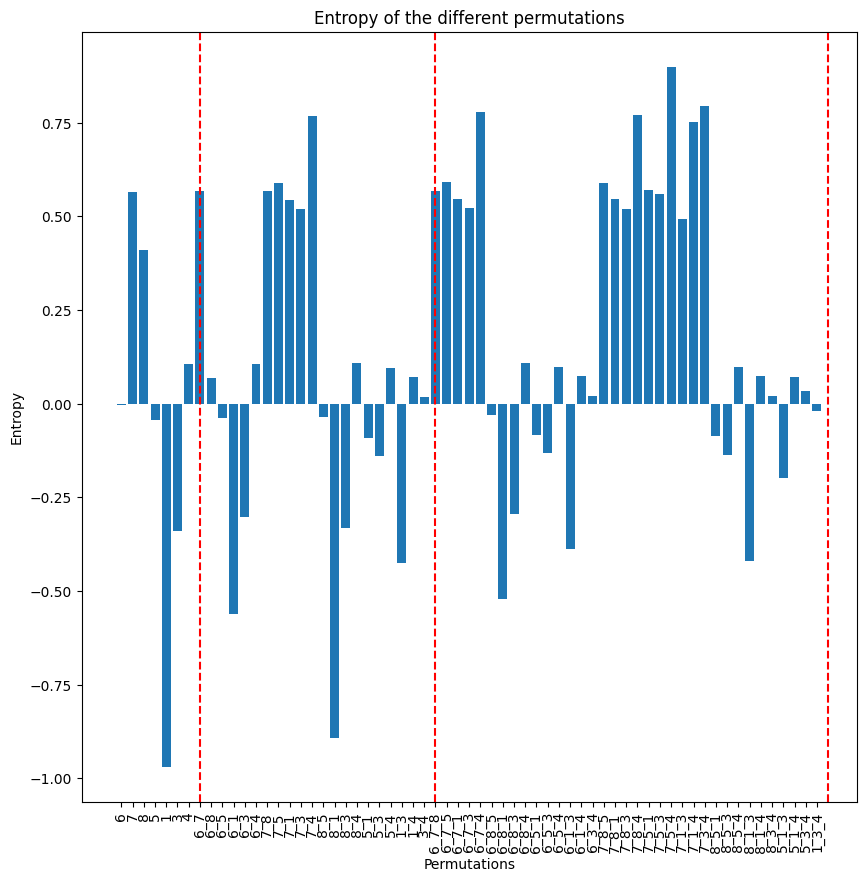

In [27]:
from math import comb

diving_lines = []
div = 0
for i in range(1, 4):
    div1 = comb(7, i) + div
    diving_lines.append(div1)
    max_partion = np.argmax(tot_entropy[div:div1]) + div
    print(f'Best partition for {i} elements: {permutations[max_partion]}')
    div = div1
    
plt.figure(figsize=(10, 10))
plt.bar(names_list, tot_entropy)
plt.xlabel('Permutations')
#rotate x labels
plt.xticks(rotation=90)
plt.ylabel('Entropy')
plt.title('Entropy of the different permutations')
    
for line in diving_lines:
    plt.axvline(x=line, color='r', linestyle='--')

Best partition for 1 elements: 1
Best partition for 2 elements: 10
Best partition for 3 elements: 21


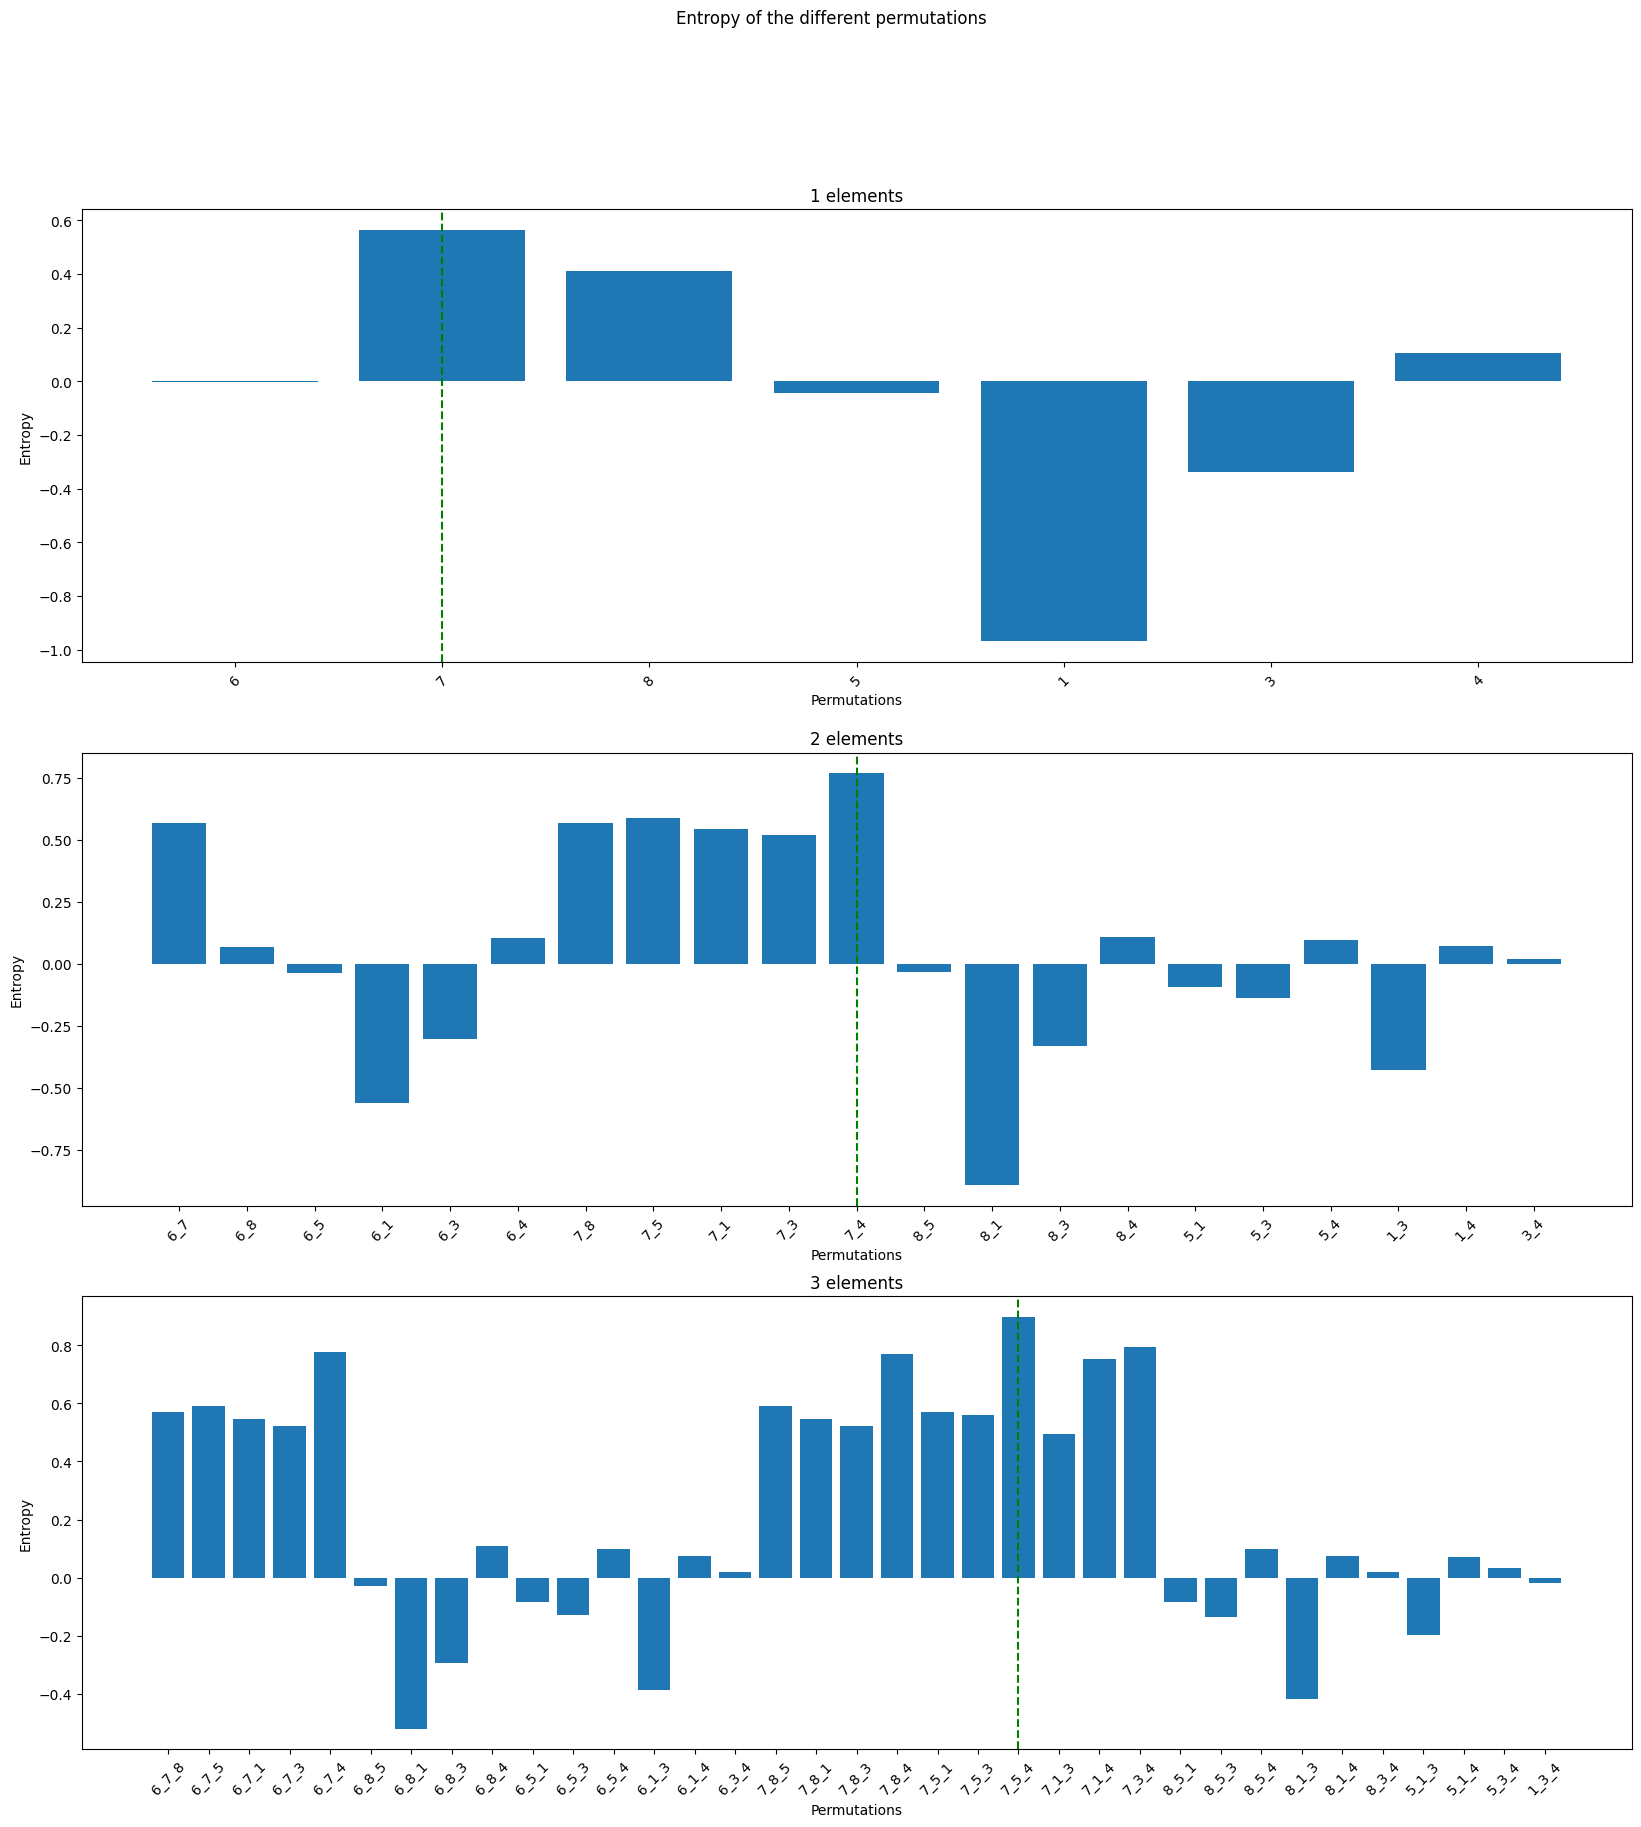

In [28]:
# make 3 suplots
fig, axs = plt.subplots(3, 1, figsize=(20, 20))
fig.suptitle('Entropy of the different permutations')
div= 0
for i in range(3):
    div1 = diving_lines[i]
    axs[i].bar(names_list[div:div1], tot_entropy[div:div1])
    max_partion = np.argmax(tot_entropy[div:div1])
    print(f'Best partition for {i+1} elements: {max_partion}')
    axs[i].axvline(x=max_partion, color='g', linestyle='--')
    axs[i].set_title(f'{i+1} elements')
    axs[i].set_ylabel('Entropy')
    axs[i].set_xlabel('Permutations')
    axs[i].set_xticklabels(names_list[div:div1], rotation=45)
   
    div = div1

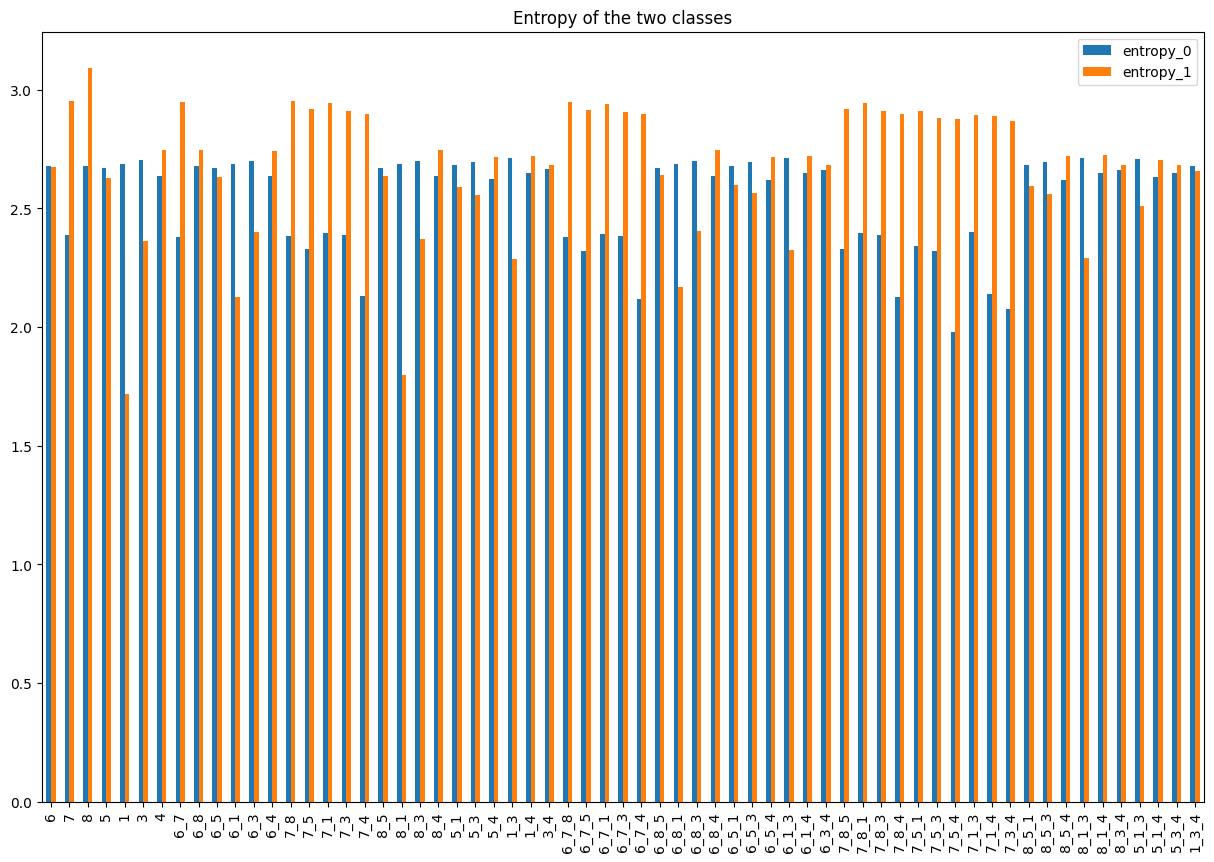

In [29]:
df_s0 = pd.DataFrame(tot_entropy_0, names_list)
df_s1 = pd.DataFrame(tot_entropy_1, names_list)
df_s01 = pd.concat([df_s0, df_s1], axis=1)

df_s01.columns = ['entropy_0', 'entropy_1']

df_s01.plot(kind = 'bar', figsize = (15, 10), title = 'Entropy of the two classes')
plt.show()


## feature selection

In [30]:
y_train_resampled_df['Claim Injury Type_5_4_7'] = y_train_resampled_df['Claim Injury Type_5'] + y_train_resampled_df['Claim Injury Type_4'] + y_train_resampled_df['Claim Injury Type_7']
y_hot_valid['Claim Injury Type_5_4_7'] = y_hot_valid['Claim Injury Type_5'] + y_hot_valid['Claim Injury Type_4'] + y_hot_valid['Claim Injury Type_7']

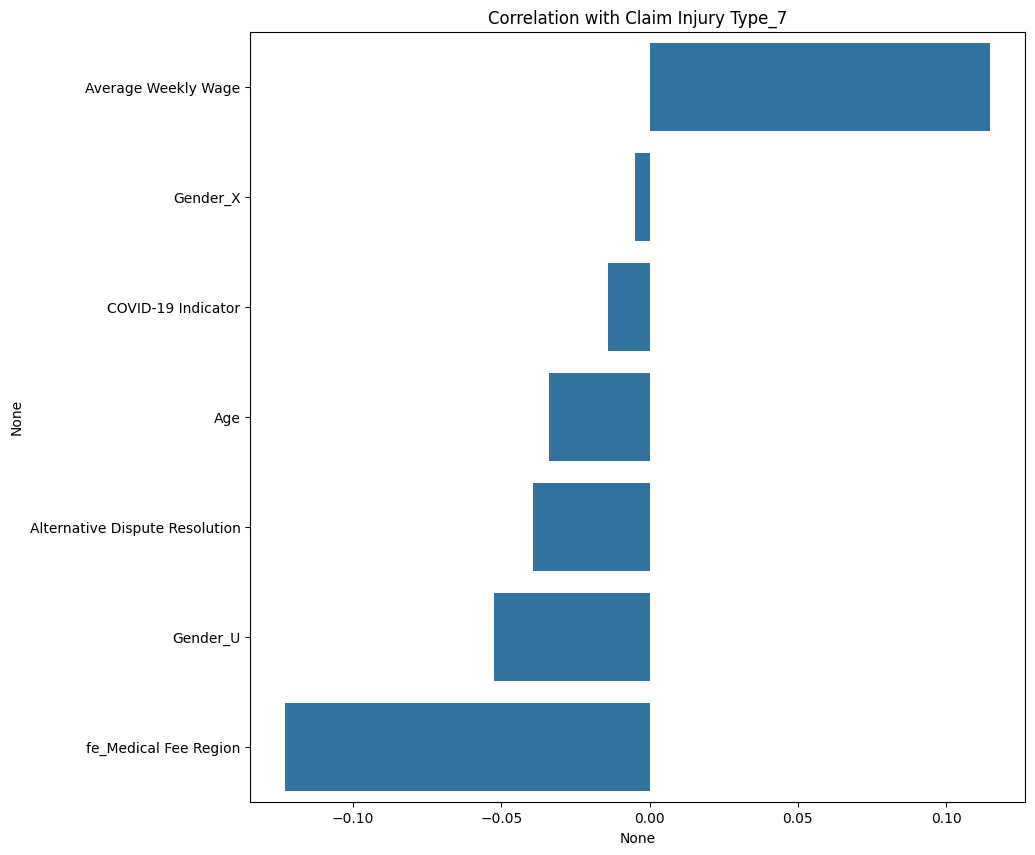

In [31]:
# correlation with target
corr = X_train_resampled.corrwith(y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
corr = corr.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=corr, y=corr.index)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


In [32]:
def entropy(feature):
    return -np.sum([p*np.log2(p) for p in feature.value_counts(normalize=True)])

In [33]:
def two_col_entropy_corr(f1, f2, n_iter=30, n_frac=0.5):
    baseline_s_x1 = entropy(f1)
    baseline_s_x2 = entropy(f2)

    s_x1 = []
    s_x2 = []
    for i in range(n_iter):
        x1 = f1.sample(frac=0.9, random_state=i)
        x2 = f2.sample(frac=0.9, random_state=i)
        s_x1.append(baseline_s_x1 - entropy(x1)/baseline_s_x1)
        s_x2.append(baseline_s_x2 - entropy(x2)/baseline_s_x2)
    return np.corrcoef(s_x1, s_x2)[0, 1]

In [34]:
# import log
from math import log

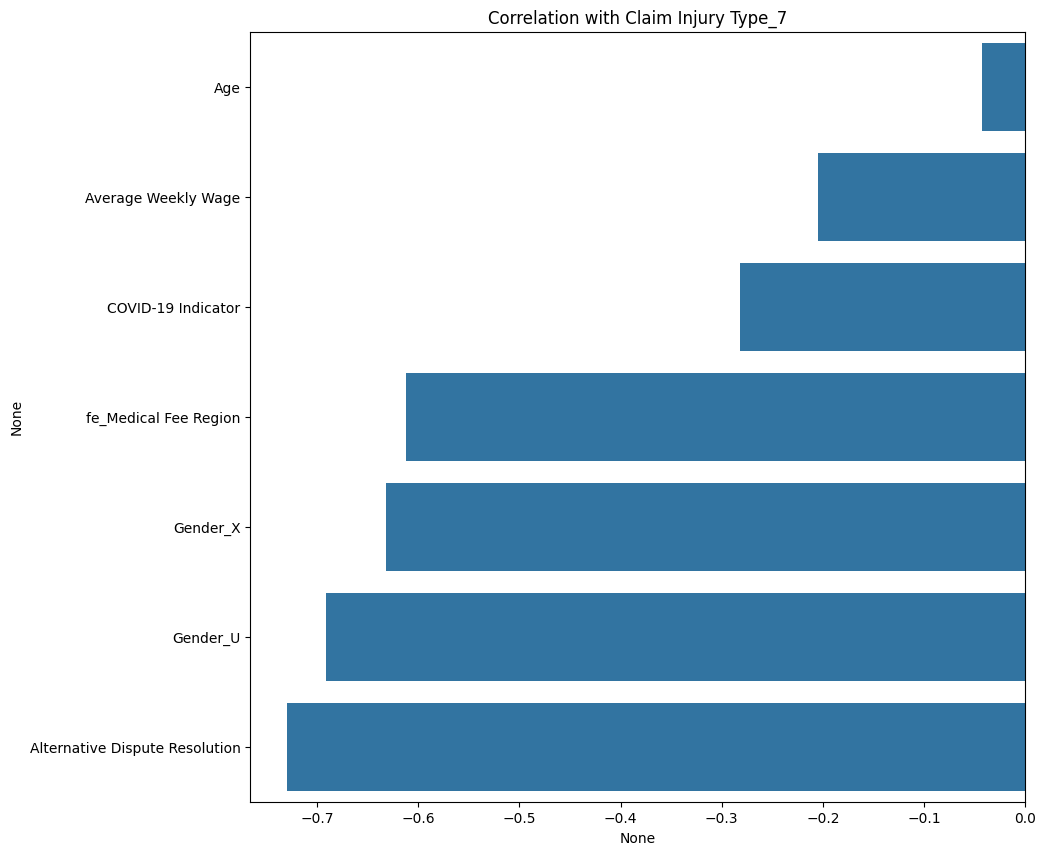

In [35]:
s_corr = []
for col in X_train_resampled:
    s_col = two_col_entropy_corr(X_train_resampled[col], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
    s_col = log((s_col +1)/2)
    s_corr.append(s_col)
    
s_corr = pd.Series(s_corr, index=X_train_resampled.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=s_corr, y=X_train_resampled.columns)
plt.title(f'Correlation with Claim Injury Type_{FEATURENUMBER}')
plt.show()


In [36]:
# removing the columns with low correlation
selected_cols = s_corr[s_corr > -0.8].index

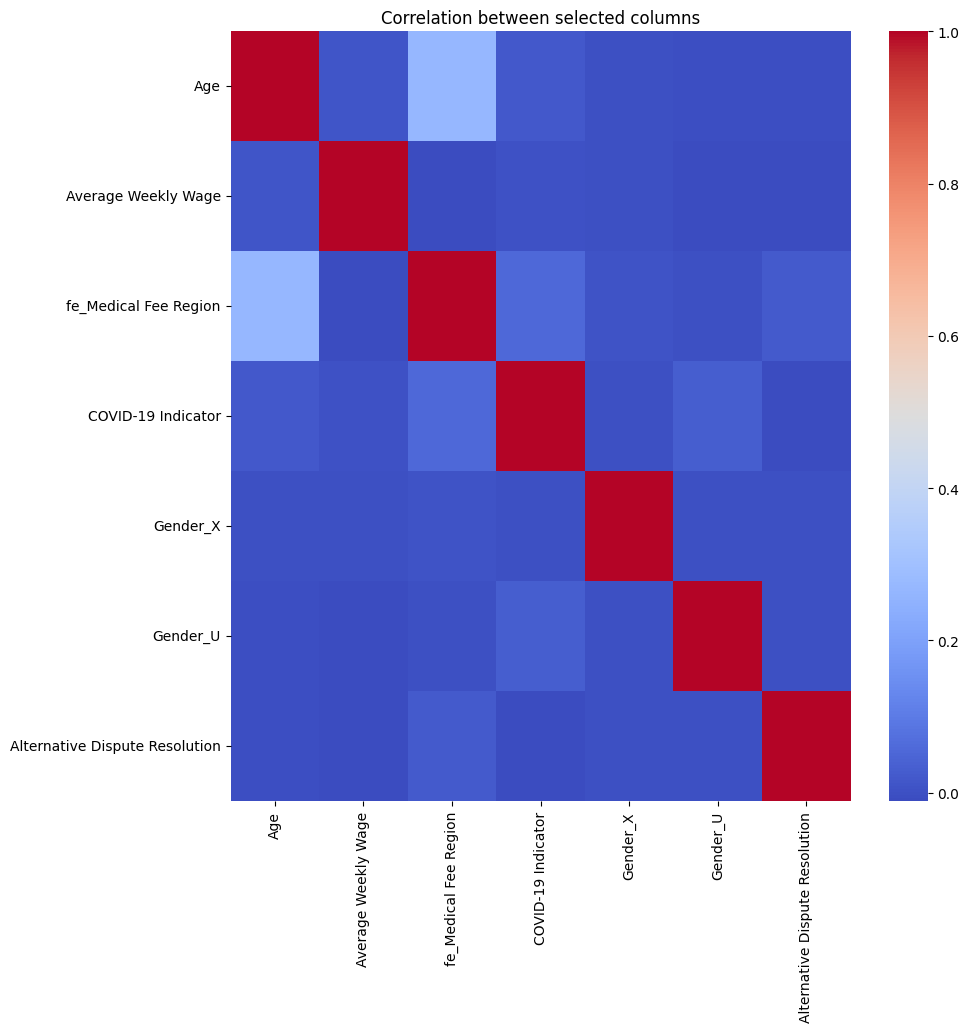

In [37]:
#correation between the selected columns
corr = X_train_resampled[selected_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation between selected columns')
plt.show()

In [38]:
# remove the columns with high correlation
corr_matrix = corr.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [39]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [40]:
to_drop

[]

In [41]:
selected_cols = [col for col in selected_cols if col not in to_drop]
len(selected_cols)

7

In [42]:
def entropy_corr(df, n_iter=30, n_frac=0.5):

    entropy_matrix = []
    for col in df.columns:
        s = entropy(df[col])
        delta_entropy = []
        for i in range(n_iter):
            x = df[col].sample(frac=n_frac, random_state=i)
            delta_entropy.append(s - entropy(x) / s)
        entropy_matrix.append(delta_entropy)
    entropy_matrix = pd.DataFrame(entropy_matrix, index=df.columns)
    entropy_matrix = entropy_matrix.T.corr()
    return entropy_matrix.applymap(lambda x: log((x + 1) / 2))

<Axes: >

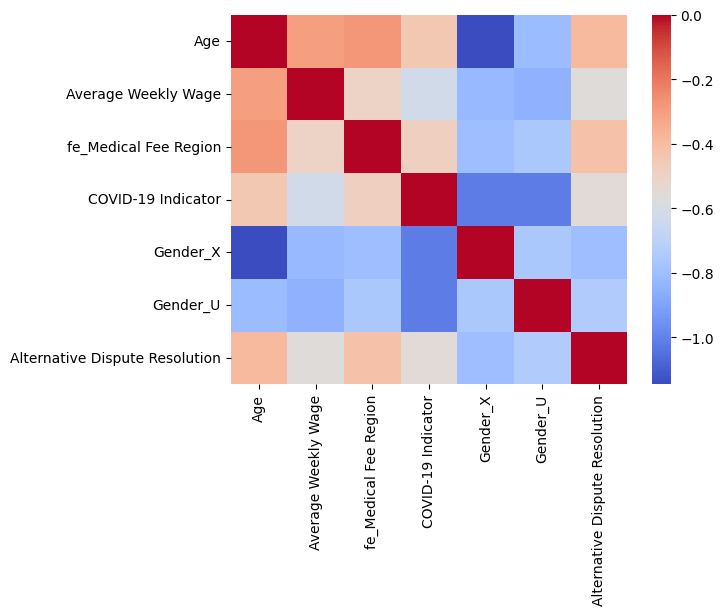

In [43]:
entropy_corr_matrix = entropy_corr(X_train_resampled[selected_cols])
sns.heatmap(entropy_corr_matrix, annot=False, cmap='coolwarm')

In [44]:
upper = entropy_corr_matrix.where(np.triu(np.ones(entropy_corr_matrix.shape), k=1).astype(np.bool))
to_drop_2 = [column for column in upper.columns if any(upper[column] > -0.2)]
to_drop_2

[]

In [45]:
selected_cols_2 = [col for col in selected_cols if col not in to_drop_2]
len(selected_cols_2)

7

In [46]:
selected_cols_2

['Age',
 'Average Weekly Wage',
 'fe_Medical Fee Region',
 'COVID-19 Indicator',
 'Gender_X',
 'Gender_U',
 'Alternative Dispute Resolution']

## model selection

In [47]:
# evaluate the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model_full = []
model_selected = []
model_selected_2 = []

#### report_and_save()

In [48]:
# Create a string
# Save the model
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def report_and_save(model,model_name,y_pred, y, model_filepath = '../Models'
                     , report_filepath = '../Reports', print_report = True): 
    
    
    model_parameters = model.get_params()
    model_filename = model_name + '.sav'
    full_model_filename_os = os.path.join(model_filepath, model_filename)
    report_filename = model_name + '.txt'
    full_report_filename_os = os.path.join(report_filepath, report_filename)

    try:
        with open(full_model_filename_os, 'wb') as file:
            pickle.dump(model, file)
    except Exception as e:
        print(f"An error occurred while saving the model: {e}")
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    cm = confusion_matrix(y, y_pred, normalize='true')

    # Save the string into a text file
    try:
        with open(full_report_filename_os, "w") as file:
            file.write(model_name)
            file.write("\n________________________\n")
            file.write('model_parameters: \n')
            file.write(str(model_parameters).replace(",", "\n"))   
            file.write("\n________________________\n")
            file.write('Accuracy: ')
            file.write(str(accuracy))
            file.write("\n________________________\n")
            file.write('Precision: ')
            file.write(str(precision))
            file.write("\n________________________\n")
            file.write('Recall: ')
            file.write(str(recall))
            file.write("\n________________________\n")
            file.write('Confusion Matrix:\n')
            file.write(str(cm))
            file.write("\n________________________\n")
    except Exception as e:
        print(f"An error occurred while writing the report: {e}")
    
    if print_report:
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        plt.figure(figsize=(10, 10))
        sns.heatmap(cm, annot=True, cmap='coolwarm')
        plt.title(f'Confusion Matrix {model_name}')   


### decision tree classifier

Accuracy: 0.7559186802083515
Precision: 0.9998235503575498
Recall: 0.7559186802083515
Accuracy: 0.7559186802083515
Precision: 0.9998235503575498
Recall: 0.7559186802083515
Accuracy: 0.7559186802083515
Precision: 0.9998235503575498
Recall: 0.7559186802083515


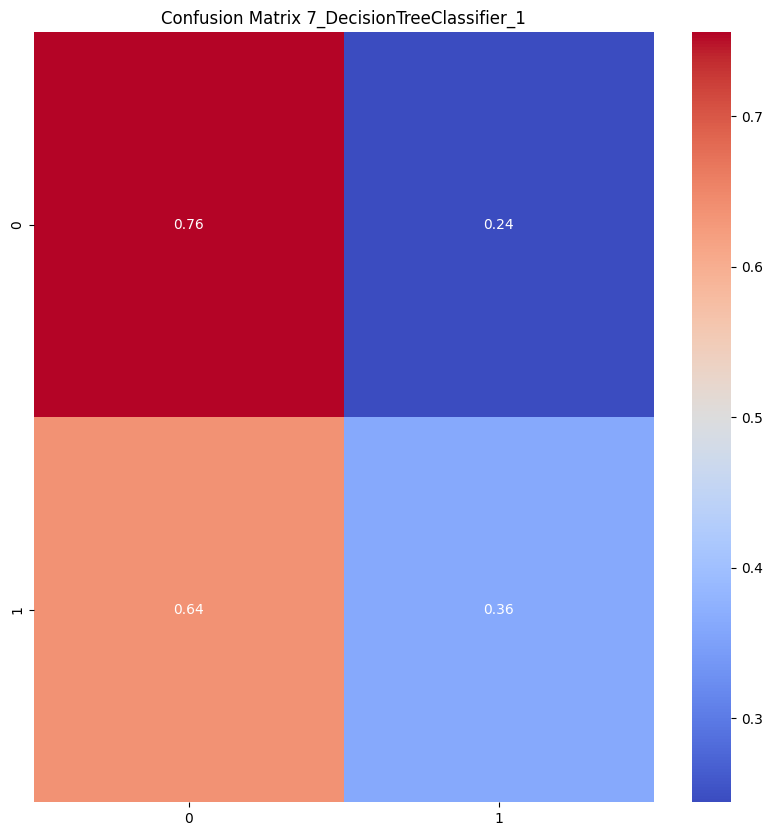

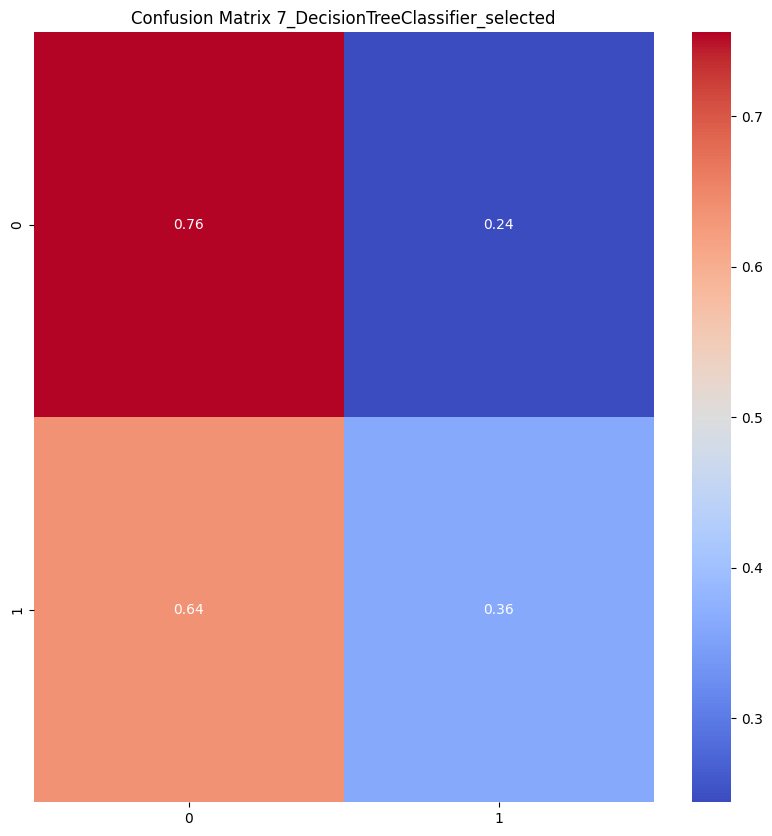

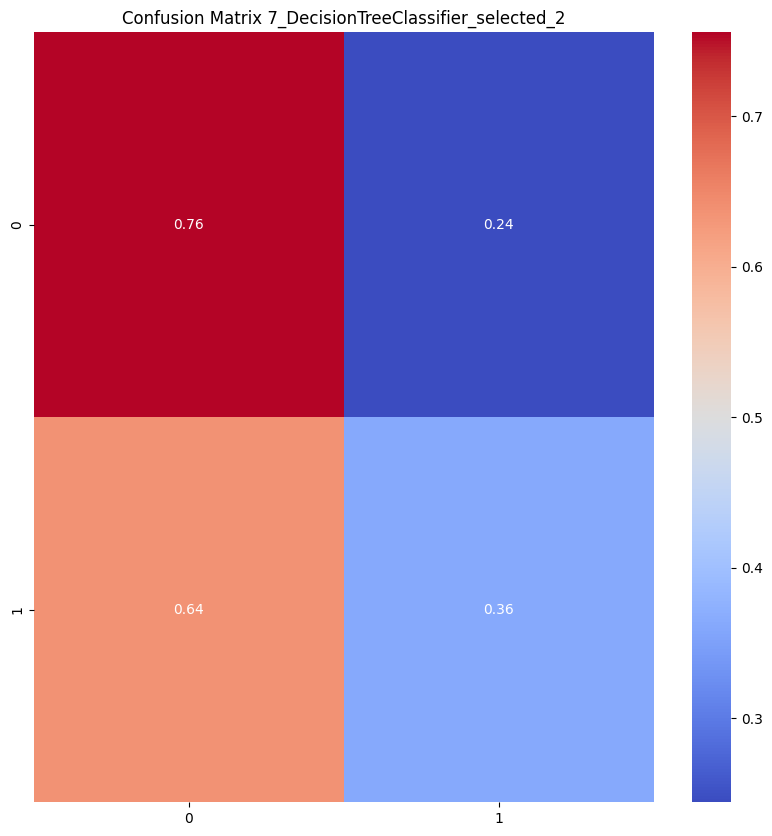

In [49]:
from sklearn.tree import DecisionTreeClassifier
# create a decision tree classifier
DecisionTreeClassifier_1 = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier_selected = DecisionTreeClassifier(random_state=0)
DecisionTreeClassifier_selected_2 = DecisionTreeClassifier(random_state=0)
num_cols = [col for col in X_train_resampled.columns if X_train_resampled[col].dtype in ['Int64', 'int64', 'float64','Float64']]

# train the classifier
DecisionTreeClassifier_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
DecisionTreeClassifier_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
DecisionTreeClassifier_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

y_pred_full = DecisionTreeClassifier_1.predict(df_valid[num_cols])
y_pred_selected = DecisionTreeClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = DecisionTreeClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("DecisionTreeClassifier",accuracy_full, f1_full))
model_selected.append(("DecisionTreeClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("DecisionTreeClassifier",accuracy_selected_2, f1_selected_2))


report_and_save(DecisionTreeClassifier_1, f'{FEATURENUMBER}_DecisionTreeClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(DecisionTreeClassifier_selected, f'{FEATURENUMBER}_DecisionTreeClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(DecisionTreeClassifier_selected_2, f'{FEATURENUMBER}_DecisionTreeClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


Accuracy: 0.8684650628015957
Precision: 0.9998239802459005
Recall: 0.8684650628015957
Accuracy: 0.8684650628015957
Precision: 0.9998239802459005
Recall: 0.8684650628015957
Accuracy: 0.8684650628015957
Precision: 0.9998239802459005
Recall: 0.8684650628015957


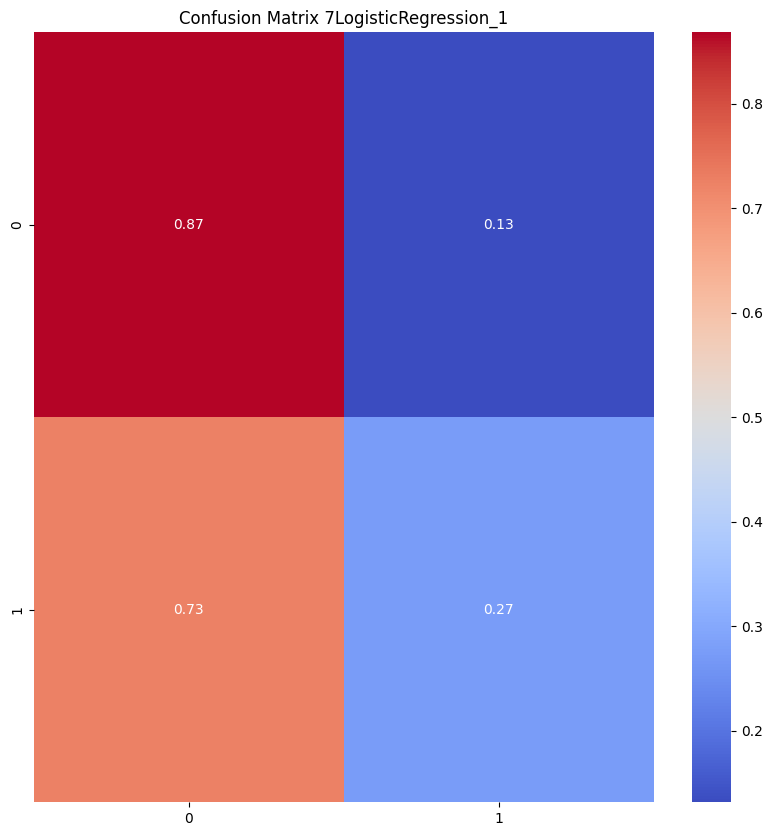

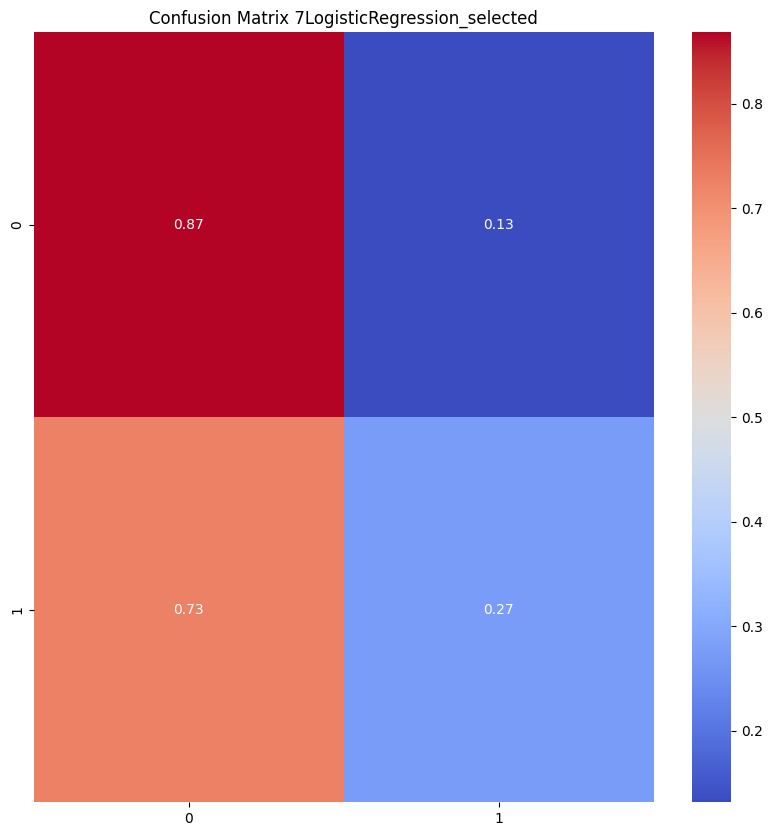

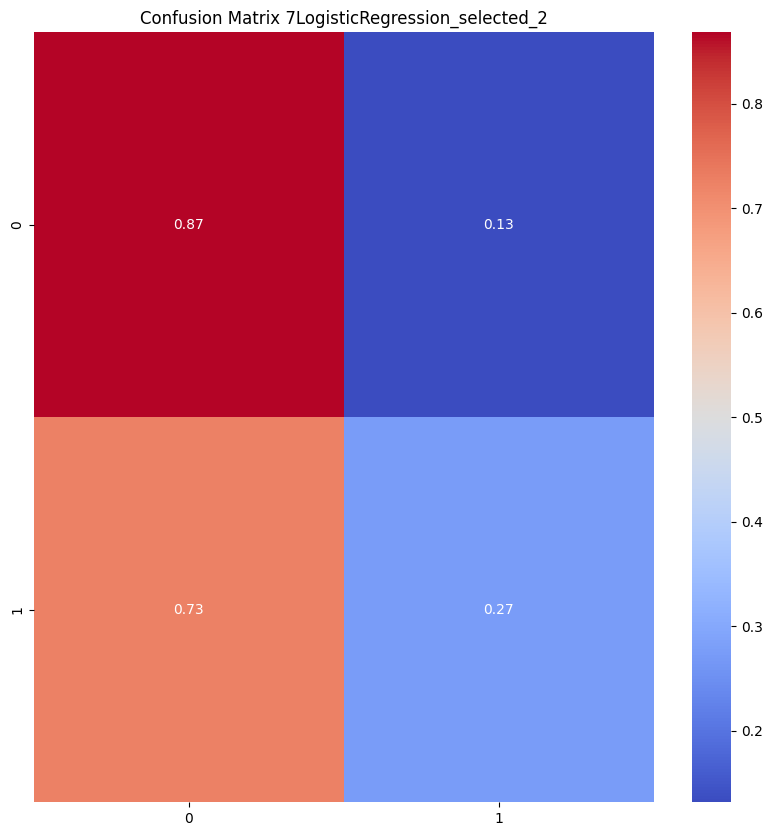

In [50]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

# create a logistic regression classifier
LogisticRegression_1 = LogisticRegression(random_state=0)
LogisticRegression_selected = LogisticRegression(random_state=0)
LogisticRegression_selected_2 = LogisticRegression(random_state=0)

# train the classifier
LogisticRegression_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
LogisticRegression_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
LogisticRegression_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_1.predict(df_valid[num_cols]))
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected.predict(df_valid[selected_cols]))
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected_2.predict(df_valid[selected_cols_2]))

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_1.predict(df_valid[num_cols]), average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected.predict(df_valid[selected_cols]), average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], LogisticRegression_selected_2.predict(df_valid[selected_cols_2]), average='macro')

model_full.append(("LogisticRegression",accuracy_full, f1_full))
model_selected.append(("LogisticRegression",accuracy_selected, f1_selected))
model_selected_2.append(("LogisticRegression",accuracy_selected_2, f1_selected_2))

report_and_save(LogisticRegression_1, f'{FEATURENUMBER}LogisticRegression_1', LogisticRegression_1.predict(df_valid[num_cols]), y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LogisticRegression_selected, f'{FEATURENUMBER}LogisticRegression_selected', LogisticRegression_selected.predict(df_valid[selected_cols]), y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LogisticRegression_selected_2, f'{FEATURENUMBER}LogisticRegression_selected_2', LogisticRegression_selected_2.predict(df_valid[selected_cols_2]), y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


### random forest

Accuracy: 0.7607006602442381
Precision: 0.999858411716284
Recall: 0.7607006602442381
Accuracy: 0.7908732993049143
Precision: 0.9998381317276888
Recall: 0.7908732993049143
Accuracy: 0.7908732993049143
Precision: 0.9998381317276888
Recall: 0.7908732993049143


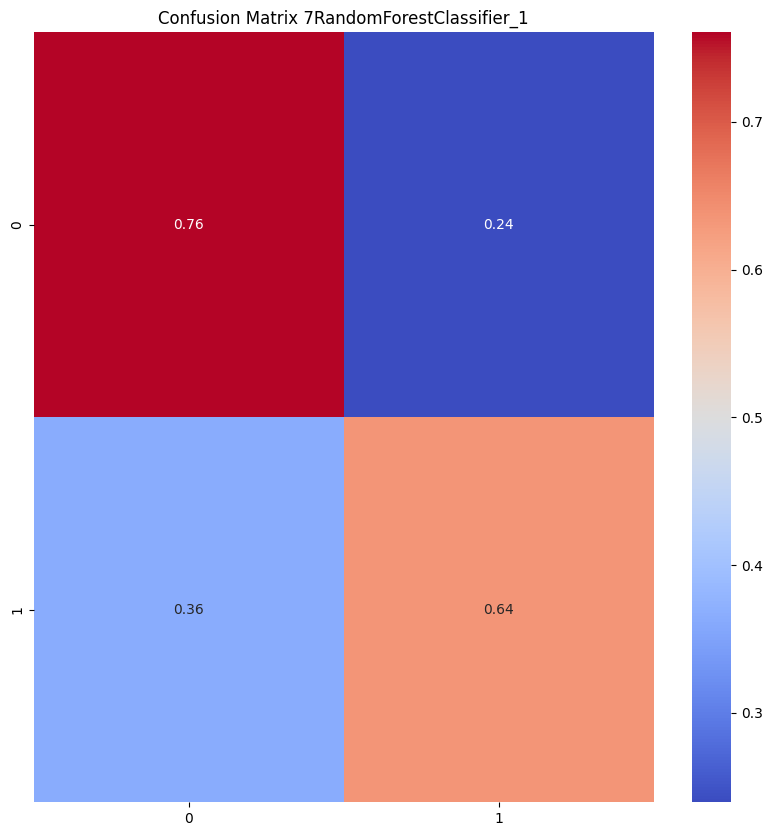

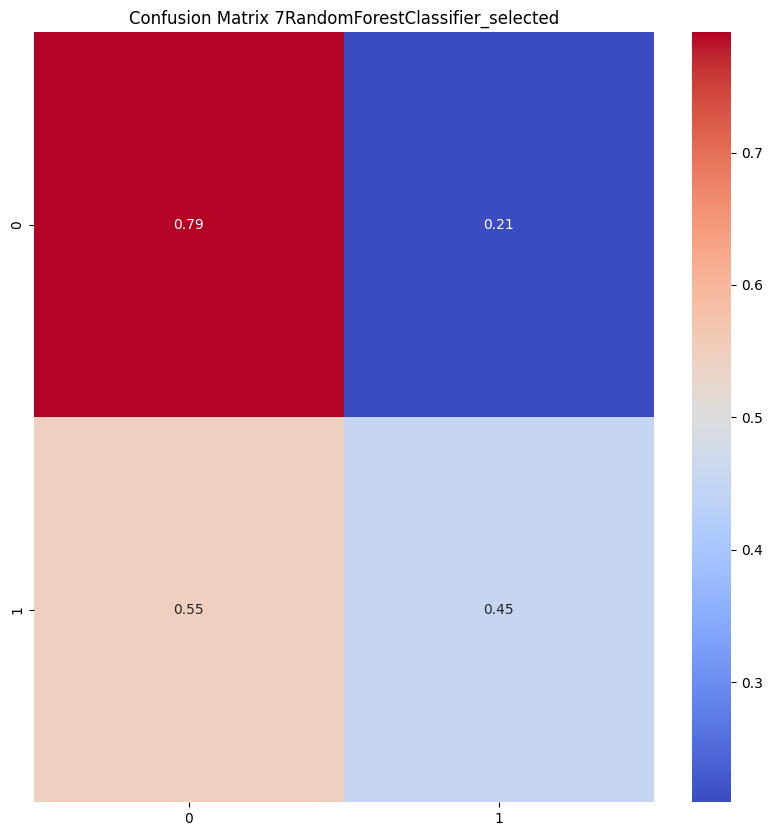

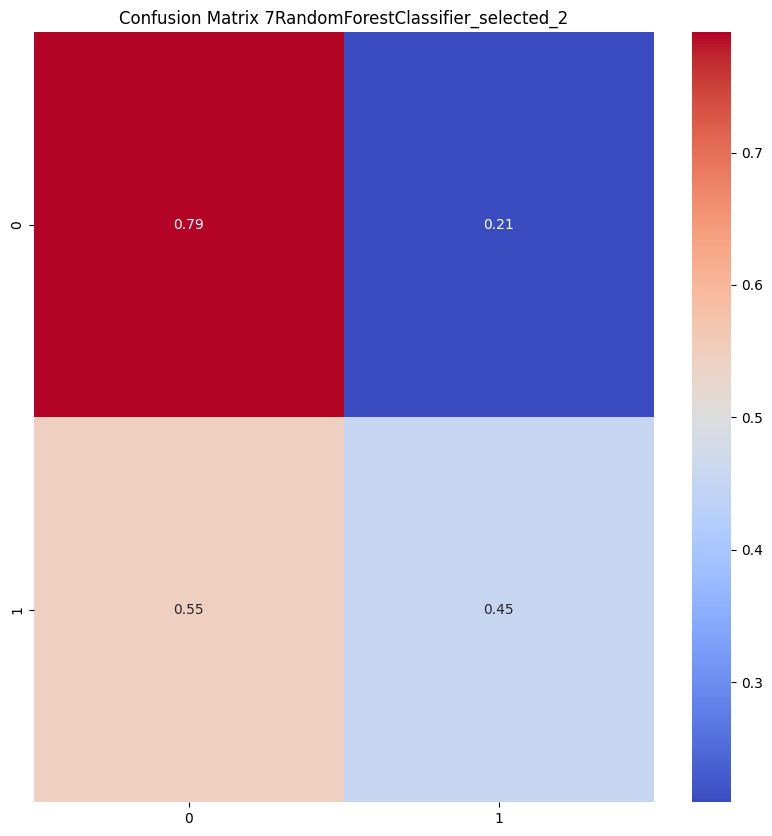

In [51]:
random_state = 42

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier
RandomForestClassifier_1 = RandomForestClassifier(random_state=random_state)
RandomForestClassifier_selected = RandomForestClassifier(random_state=random_state)
RandomForestClassifier_selected_2 = RandomForestClassifier(random_state=random_state)

# train the classifier
RandomForestClassifier_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
RandomForestClassifier_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
RandomForestClassifier_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = RandomForestClassifier_1.predict(df_valid[num_cols])
y_pred_selected = RandomForestClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = RandomForestClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("RandomForestClassifier",accuracy_full, f1_full))
model_selected.append(("RandomForestClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("RandomForestClassifier",accuracy_selected_2, f1_selected_2))

report_and_save(RandomForestClassifier_1, f'{FEATURENUMBER}RandomForestClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(RandomForestClassifier_selected, f'{FEATURENUMBER}RandomForestClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(RandomForestClassifier_selected_2, f'{FEATURENUMBER}RandomForestClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])

# XGBoost

Accuracy: 0.8671585108792224
Precision: 0.9998640540043056
Recall: 0.8671585108792224
Accuracy: 0.8671585108792224
Precision: 0.9998640540043056
Recall: 0.8671585108792224
Accuracy: 0.8671585108792224
Precision: 0.9998640540043056
Recall: 0.8671585108792224


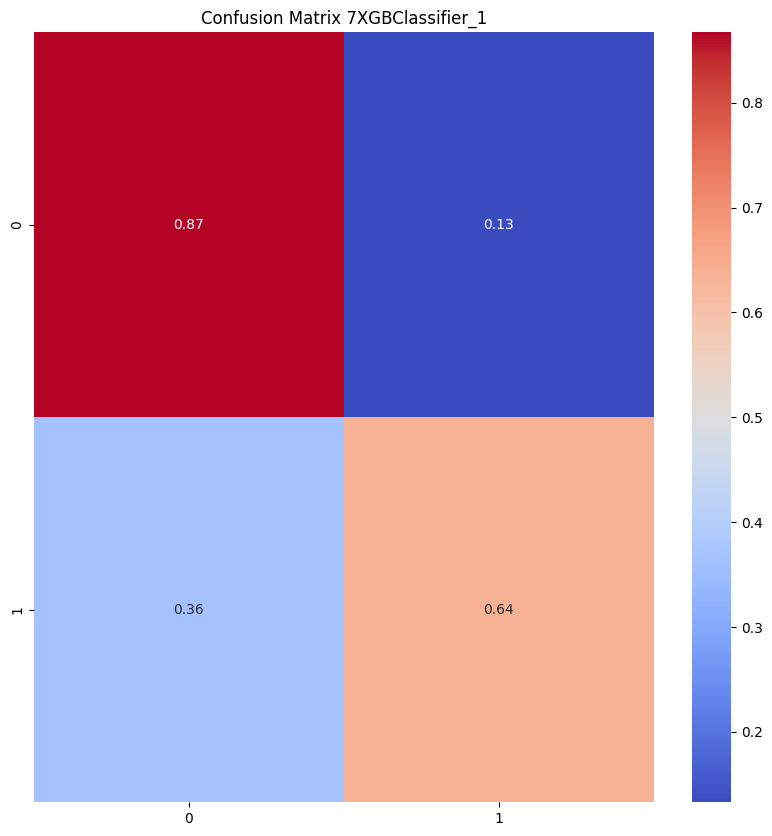

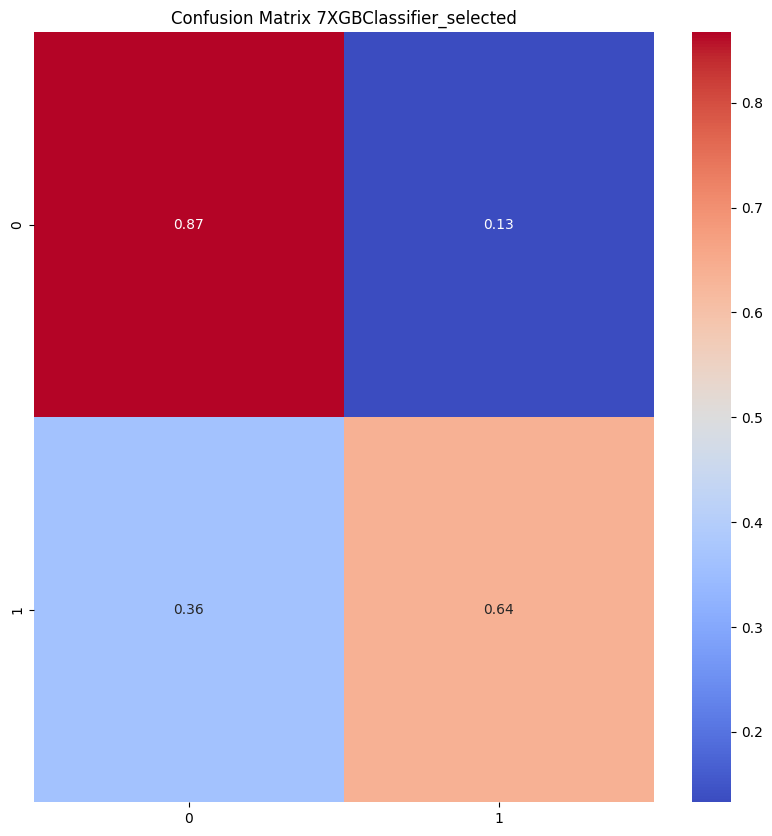

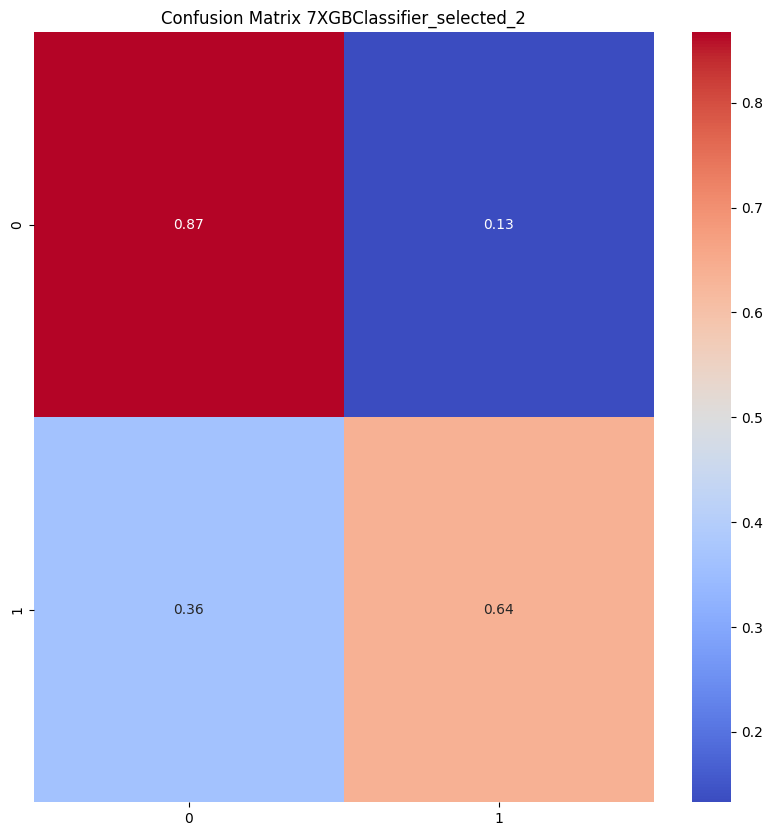

In [52]:
import xgboost 
from xgboost import XGBClassifier

# create a xgboost classifier
XGBClassifier_1 = XGBClassifier(random_state=random_state)
XGBClassifier_selected = XGBClassifier(random_state=random_state)
XGBClassifier_selected_2 = XGBClassifier(random_state=random_state)

# train the classifier
XGBClassifier_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
XGBClassifier_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
XGBClassifier_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = XGBClassifier_1.predict(df_valid[num_cols])
y_pred_selected = XGBClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = XGBClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)
f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("XGBClassifier",accuracy_full, f1_full))
model_selected.append(("XGBClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("XGBClassifier",accuracy_selected_2, f1_selected_2))

report_and_save(XGBClassifier_1, f'{FEATURENUMBER}XGBClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(XGBClassifier_selected, f'{FEATURENUMBER}XGBClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(XGBClassifier_selected_2, f'{FEATURENUMBER}XGBClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


# LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 233101, number of negative: 459134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 692235, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336737 -> initscore=-0.677870
[LightGBM] [Info] Start training from score -0.677870
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 233101, number of negative: 459134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

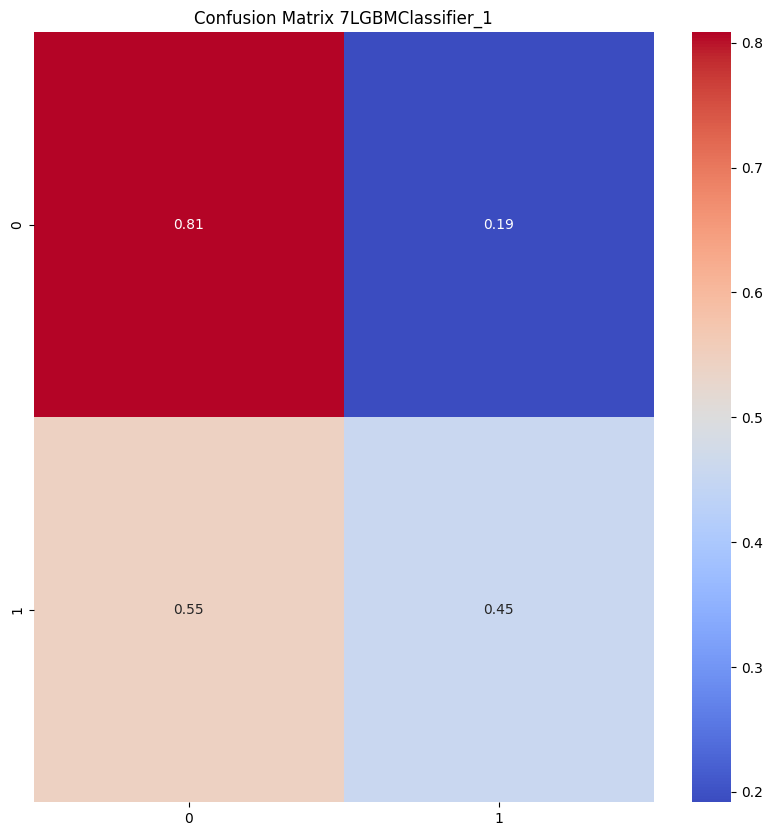

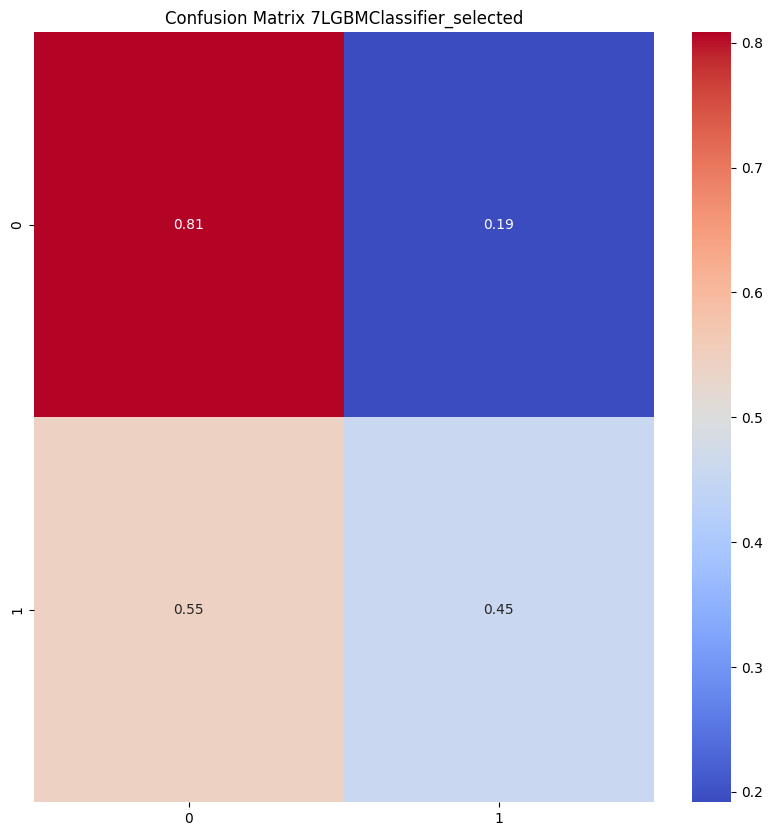

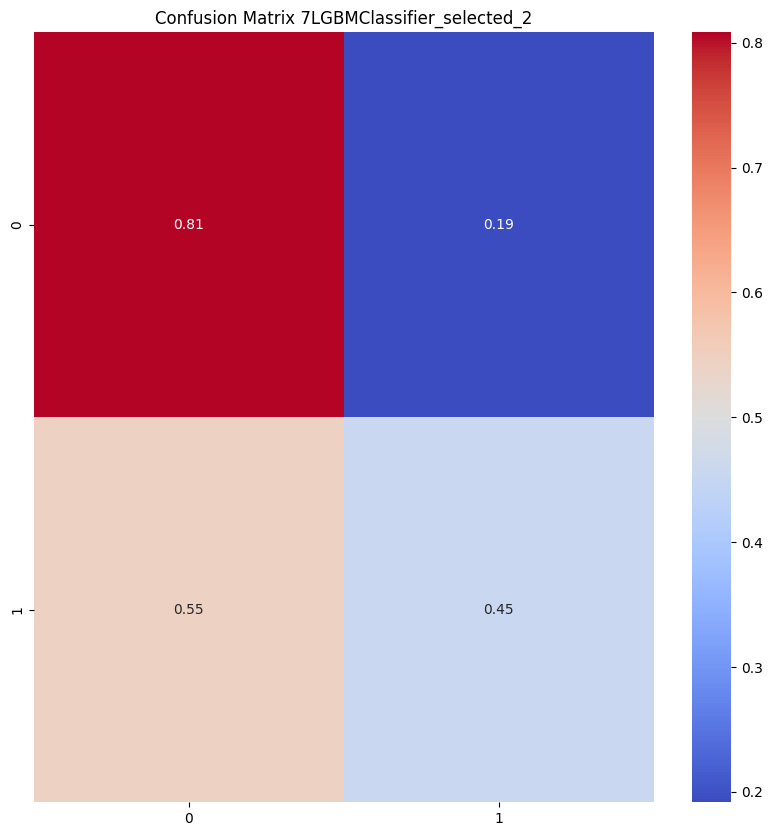

In [53]:
# import lightgbm classifier
from lightgbm import LGBMClassifier

# create a lightgbm classifier
LGBMClassifier_1 = LGBMClassifier(random_state=random_state)
LGBMClassifier_selected = LGBMClassifier(random_state=random_state)
LGBMClassifier_selected_2 = LGBMClassifier(random_state=random_state)

# train the classifier
LGBMClassifier_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
LGBMClassifier_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
LGBMClassifier_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = LGBMClassifier_1.predict(df_valid[num_cols])
y_pred_selected = LGBMClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = LGBMClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)
f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("LGBMClassifier",accuracy_full, f1_full))
model_selected.append(("LGBMClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("LGBMClassifier",accuracy_selected_2, f1_selected_2))

report_and_save(LGBMClassifier_1, f'{FEATURENUMBER}LGBMClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LGBMClassifier_selected, f'{FEATURENUMBER}LGBMClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(LGBMClassifier_selected_2, f'{FEATURENUMBER}LGBMClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])

In [54]:
for name, accuracy, f1 in model_full:
    print(f'{name}: accuracy={accuracy}, f1={f1}')

DecisionTreeClassifier: accuracy=0.7559186802083515, f1=0.4306374904862863
LogisticRegression: accuracy=0.8684650628015957, f1=0.4649989377422368
RandomForestClassifier: accuracy=0.7607006602442381, f1=0.43229424531018534
XGBClassifier: accuracy=0.8671585108792224, f1=0.4648830732696288
LGBMClassifier: accuracy=0.8082504398724806, f1=0.44720372891928123


Accuracy: 0.910588296778914
Precision: 0.9998659915797273
Recall: 0.910588296778914
Accuracy: 0.9101353587791579
Precision: 0.9998468163707271
Recall: 0.9101353587791579
Accuracy: 0.9101353587791579
Precision: 0.9998468163707271
Recall: 0.9101353587791579


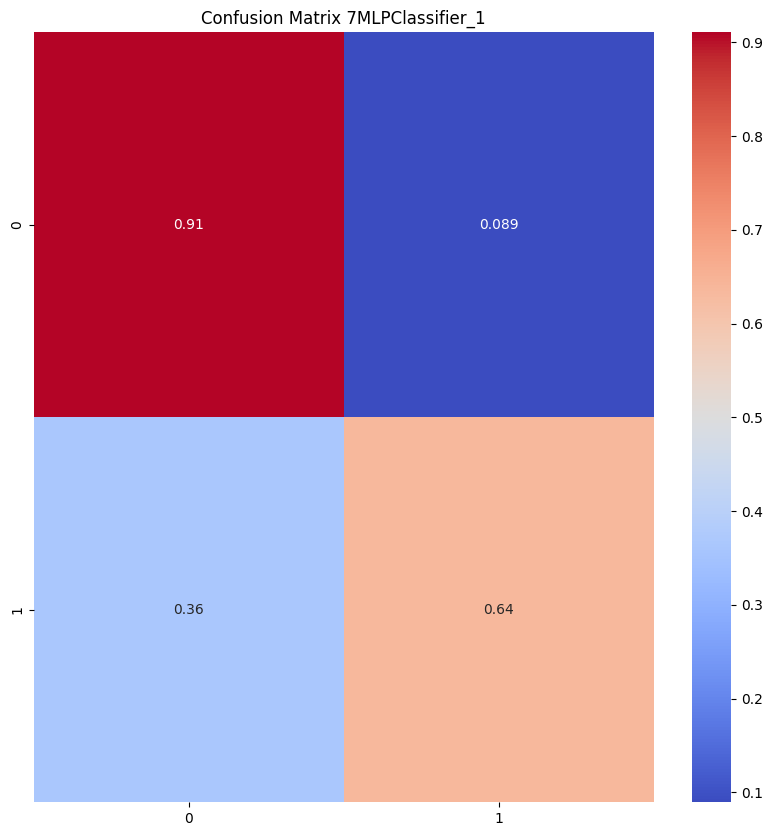

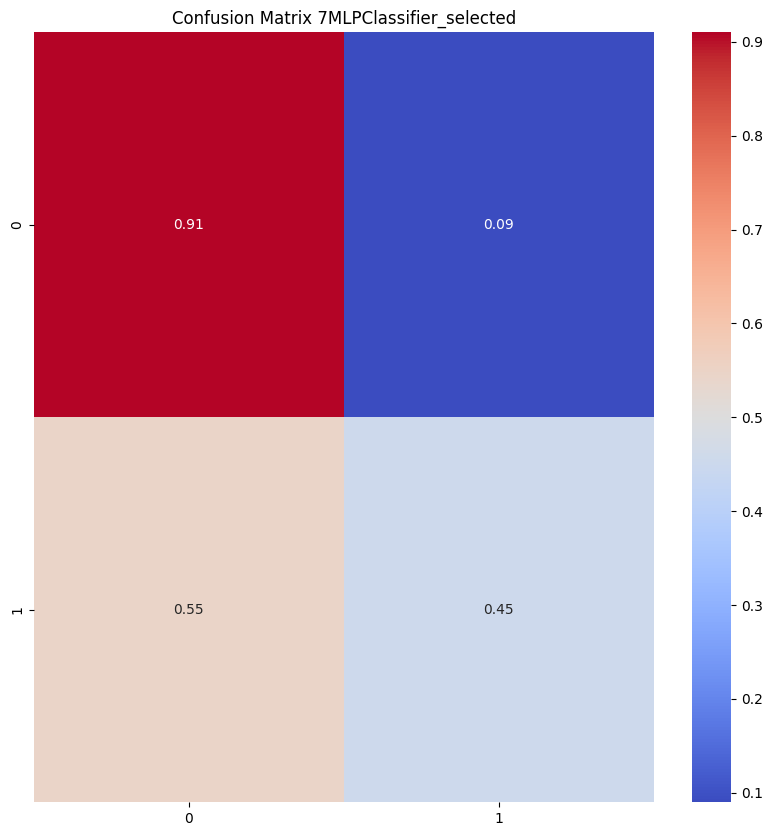

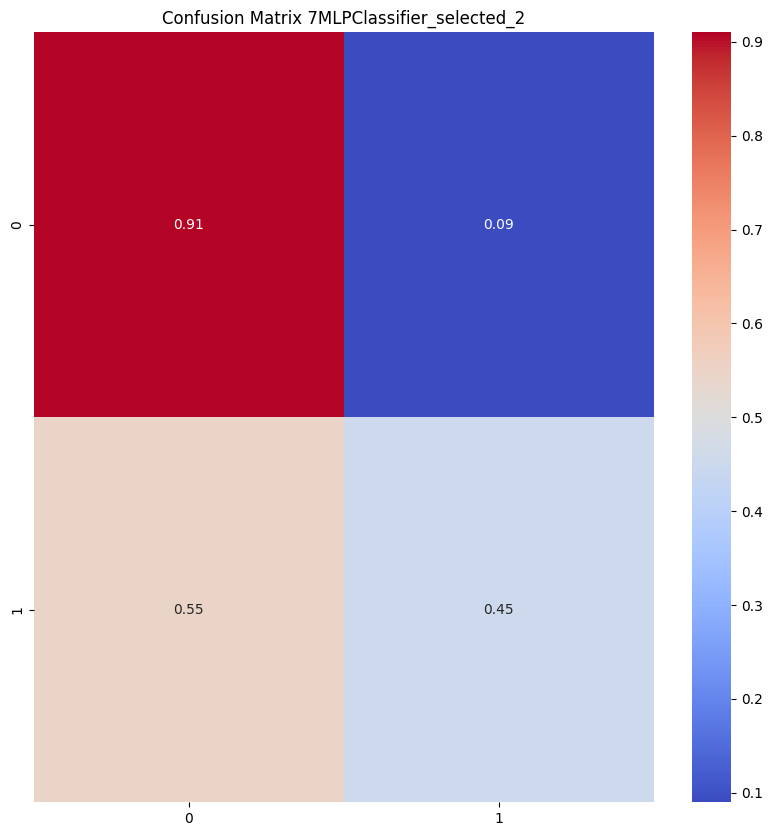

In [55]:
# multillayer perceptron
from sklearn.neural_network import MLPClassifier

# create a multilayer perceptron classifier
MLPClassifier_1 = MLPClassifier(random_state=random_state)
MLPClassifier_selected = MLPClassifier(random_state=random_state)
MLPClassifier_selected_2 = MLPClassifier(random_state=random_state)

# train the classifier
MLPClassifier_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
MLPClassifier_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
MLPClassifier_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = MLPClassifier_1.predict(df_valid[num_cols])
y_pred_selected = MLPClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = MLPClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("MLPClassifier",accuracy_full, f1_full))
model_selected.append(("MLPClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("MLPClassifier",accuracy_selected_2, f1_selected_2))

report_and_save(MLPClassifier_1, f'{FEATURENUMBER}MLPClassifier_1', y_pred_full, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(MLPClassifier_selected, f'{FEATURENUMBER}MLPClassifier_selected', y_pred_selected, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])
report_and_save(MLPClassifier_selected_2, f'{FEATURENUMBER}MLPClassifier_selected_2', y_pred_selected_2, y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'])


In [56]:
"""# svm classifier
from sklearn.svm import SVC

# create a svm classifier
SVC_1 = SVC(random_state=random_state)
SVC_selected = SVC(random_state=random_state)
SVC_selected_2 = SVC(random_state=random_state)

# train the classifier
SVC_1.fit(df_train[num_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected.fit(df_train[selected_cols], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])
SVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = SVC_1.predict(df_valid[num_cols])
y_pred_selected = SVC_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("SVC",accuracy_full, f1_full))
model_selected.append(("SVC",accuracy_selected, f1_selected))
model_selected_2.append(("SVC",accuracy_selected_2, f1_selected_2))

"""

'# svm classifier\nfrom sklearn.svm import SVC\n\n# create a svm classifier\nSVC_1 = SVC(random_state=random_state)\nSVC_selected = SVC(random_state=random_state)\nSVC_selected_2 = SVC(random_state=random_state)\n\n# train the classifier\nSVC_1.fit(df_train[num_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected.fit(df_train[selected_cols], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\nSVC_selected_2.fit(df_train[selected_cols_2], y_hot_train[f\'Claim Injury Type_{FEATURENUMBER}\'])\n\n# evaluate the classifier\ny_pred_full = SVC_1.predict(df_valid[num_cols])\ny_pred_selected = SVC_selected.predict(df_valid[selected_cols])\ny_pred_selected_2 = SVC_selected_2.predict(df_valid[selected_cols_2])\n\naccuracy_full  = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_full)\naccuracy_selected = accuracy_score(y_hot_valid[f\'Claim Injury Type_{FEATURENUMBER}\'], y_pred_selected)\naccuracy_selected_2 = accuracy_score(y_hot_valid[f\'Claim In

## voting classifier

In [57]:
# import the voting classifier
from sklearn.ensemble import VotingClassifier

# create a voting classifier
VotingClassifier_1 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_1),
                                                  ('LogisticRegression', LogisticRegression_1),
                                                  ('RandomForestClassifier', RandomForestClassifier_1),
                                                  ('XGBClassifier', XGBClassifier_1),
                                                  ('LGBMClassifier', LGBMClassifier_1),
                                                  ('MLPClassifier', MLPClassifier_1)], voting='soft')
                                                  #('SVC', SVC_1)], voting='soft')


VotingClassifier_selected = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_selected),
                                                         ('LogisticRegression', LogisticRegression_selected),
                                                         ('RandomForestClassifier', RandomForestClassifier_selected),
                                                         ('XGBClassifier', XGBClassifier_selected),
                                                         ('LGBMClassifier', LGBMClassifier_selected),
                                                         ('MLPClassifier', MLPClassifier_selected)], voting='soft')
                                                         #('SVC', SVC_selected)], voting='soft')

VotingClassifier_selected_2 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier_selected_2),
                                                           ('LogisticRegression', LogisticRegression_selected_2),
                                                           ('RandomForestClassifier', RandomForestClassifier_selected_2),
                                                           ('XGBClassifier', XGBClassifier_selected_2),
                                                           ('LGBMClassifier', LGBMClassifier_selected_2),
                                                           ('MLPClassifier', MLPClassifier_selected_2)], voting='soft')
                                                           #('SVC', SVC_selected_2)], voting='soft')



# train the classifier
VotingClassifier_1.fit(X_train_resampled[num_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
VotingClassifier_selected.fit(X_train_resampled[selected_cols], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])
VotingClassifier_selected_2.fit(X_train_resampled[selected_cols_2], y_train_resampled_df[f'Claim Injury Type_{FEATURENUMBER}'])

# evaluate the classifier
y_pred_full = VotingClassifier_1.predict(df_valid[num_cols])
y_pred_selected = VotingClassifier_selected.predict(df_valid[selected_cols])
y_pred_selected_2 = VotingClassifier_selected_2.predict(df_valid[selected_cols_2])

accuracy_full  = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full)
accuracy_selected = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected)
accuracy_selected_2 = accuracy_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2)

f1_full = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_full, average='macro')
f1_selected = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected, average='macro')
f1_selected_2 = f1_score(y_hot_valid[f'Claim Injury Type_{FEATURENUMBER}'], y_pred_selected_2, average='macro')

model_full.append(("VotingClassifier",accuracy_full, f1_full))
model_selected.append(("VotingClassifier",accuracy_selected, f1_selected))
model_selected_2.append(("VotingClassifier",accuracy_selected_2, f1_selected_2))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 233101, number of negative: 459134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 692235, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336737 -> initscore=-0.677870
[LightGBM] [Info] Start training from score -0.677870
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 233101, number of negative: 459134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

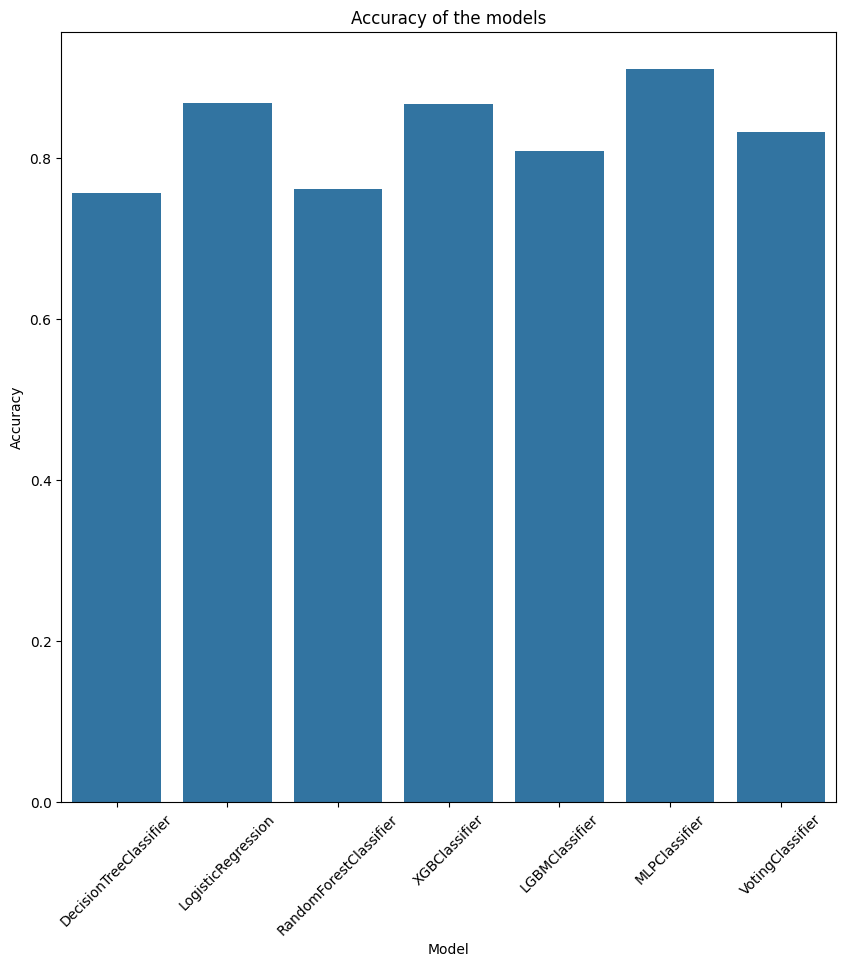

In [58]:
# plotting the results
model_full = pd.DataFrame(model_full, columns=['Model', 'Accuracy', 'F1'])
model_selected = pd.DataFrame(model_selected, columns=['Model', 'Accuracy', 'F1'])
model_selected_2 = pd.DataFrame(model_selected_2, columns=['Model', 'Accuracy', 'F1'])

plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='Accuracy', data=model_full)
plt.title('Accuracy of the models')
plt.xticks(rotation=45)
plt.show()

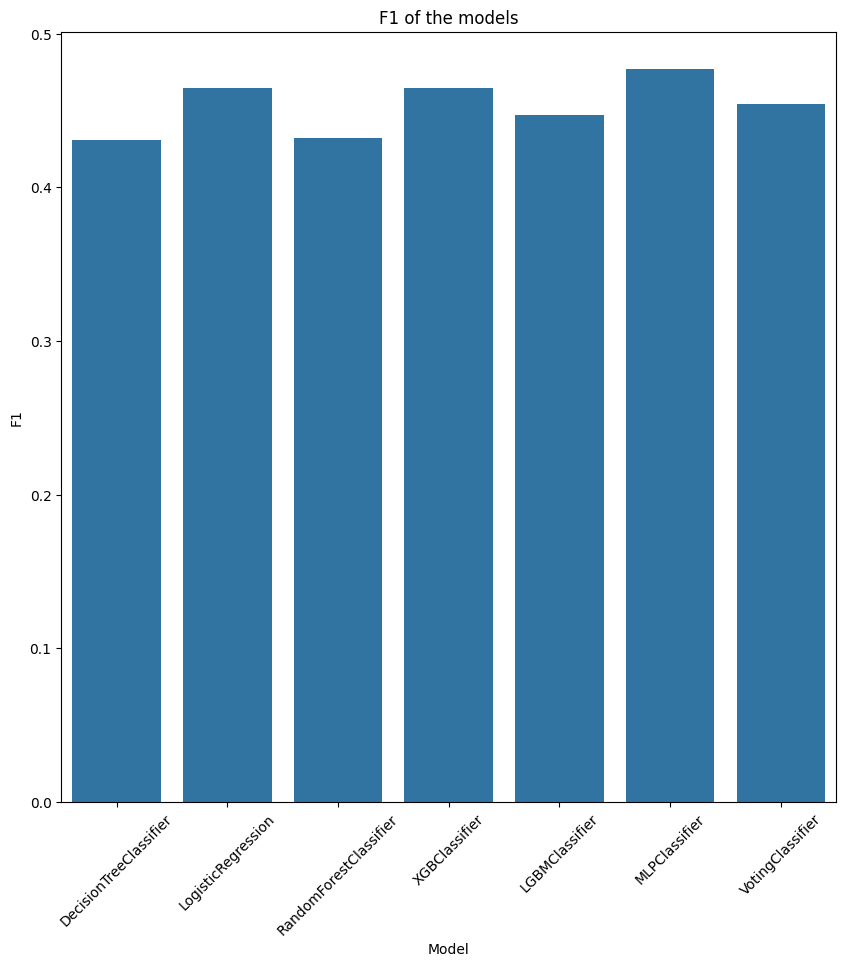

In [59]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Model', y='F1', data=model_full)
plt.title('F1 of the models')
plt.xticks(rotation=45)
plt.show()

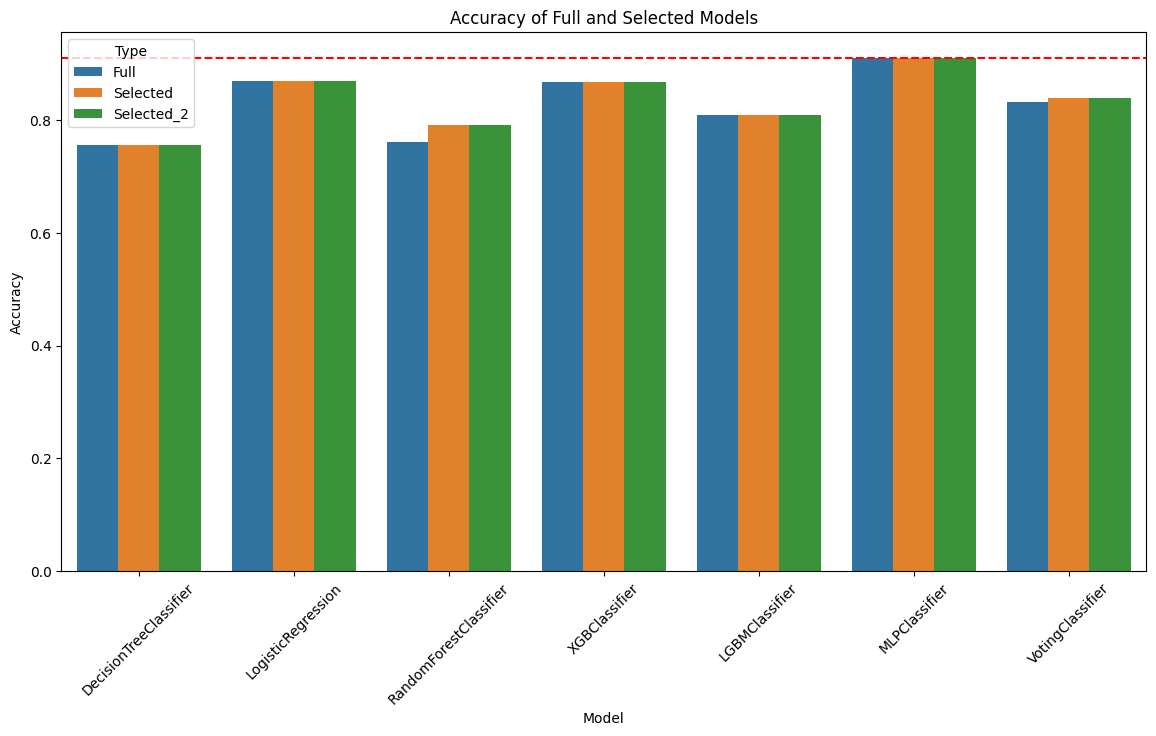

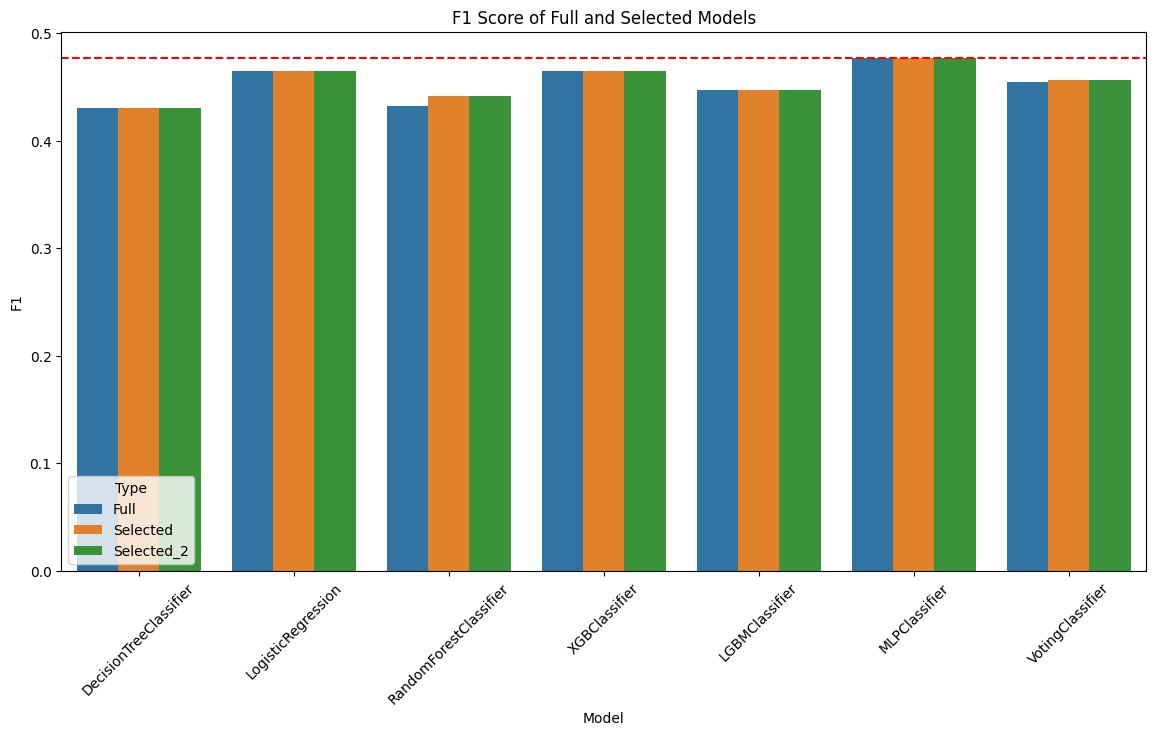

In [60]:
import seaborn as sns

import matplotlib.pyplot as plt

# Combine the dataframes for full and selected models
model_full['Type'] = 'Full'
model_selected['Type'] = 'Selected'
model_selected_2['Type'] = 'Selected_2' 
combined_df = pd.concat([model_full, model_selected])
combined_df = pd.concat([combined_df, model_selected_2])

# Plot the accuracy
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Accuracy', hue='Type', data=combined_df)
plt.title('Accuracy of Full and Selected Models')
# horizontal line at maximum accuracy
plt.axhline(combined_df['Accuracy'].max(), color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Plot the F1 score
plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='F1', hue='Type', data=combined_df)
plt.title('F1 Score of Full and Selected Models')
plt.axhline(combined_df['F1'].max(), color='red', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# 

In [61]:
?XGBClassifier

Init signature:
XGBClassifier(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with highest loss change.

    learning_rate : typing.Optional[float

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import PredefinedSplit

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
selected_cols_2 

['Age',
 'Average Weekly Wage',
 'fe_Medical Fee Region',
 'COVID-19 Indicator',
 'Gender_X',
 'Gender_U',
 'Alternative Dispute Resolution']

In [66]:
df_valid[selected_cols_2]

,Age,Average Weekly Wage,fe_Medical Fee Region,COVID-19 Indicator,Gender_X,Gender_U,Alternative Dispute Resolution
Claim Identifier,,,,,,,
6143035,0.136364,0.000000,0.711128,0,0.0,0.0,0
5525593,-0.727273,1.067708,0.001371,0,0.0,0.0,0
5539202,0.227273,0.907021,-0.452592,0,0.0,0.0,0
5578055,0.636364,1.446946,0.711128,0,0.0,0.0,0
5473728,-0.318182,2.028958,0.711128,0,0.0,0.0,0
...,...,...,...,...,...,...,...
5744019,-0.272727,0.703606,0.711128,0,0.0,0.0,0
5403940,0.863636,0.759823,-0.452592,0,0.0,0.0,0
6090655,1.090909,0.000000,0.001371,1,0.0,0.0,0


In [67]:
filtered_y_val = y_hot_valid.loc[df_valid[selected_cols_2].index]

In [68]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [69]:
filtered_y_val

,Claim Injury Type_1,Claim Injury Type_2,Claim Injury Type_3,Claim Injury Type_4,Claim Injury Type_5,Claim Injury Type_6,Claim Injury Type_7,Claim Injury Type_8,Claim Injury Type_5_4_7
Claim Identifier,,,,,,,,,
6143035,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5525593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5539202,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5578055,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5473728,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5744019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5403940,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6090655,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
y_train_resampled_df

,Claim Injury Type_1,Claim Injury Type_2,Claim Injury Type_3,Claim Injury Type_4,Claim Injury Type_5,Claim Injury Type_6,Claim Injury Type_7,Claim Injury Type_8,Claim Injury Type_5_4_7
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
692230,0,0,0,0,0,0,1,0,1
692231,0,0,0,0,0,0,1,0,1
692232,0,0,0,0,0,0,1,0,1
692233,0,0,0,0,0,0,1,0,1


In [74]:
type7 = y_train_resampled_df['Claim Injury Type_7']

In [75]:
type7_val = filtered_y_val['Claim Injury Type_7']

In [79]:
selected_cols_2

['Age',
 'Average Weekly Wage',
 'fe_Medical Fee Region',
 'COVID-19 Indicator',
 'Gender_X',
 'Gender_U',
 'Alternative Dispute Resolution']

In [77]:
df_valid[selected_cols_2]

,Age,Average Weekly Wage,fe_Medical Fee Region,COVID-19 Indicator,Gender_X,Gender_U,Alternative Dispute Resolution
Claim Identifier,,,,,,,
6143035,0.136364,0.000000,0.711128,0,0.0,0.0,0
5525593,-0.727273,1.067708,0.001371,0,0.0,0.0,0
5539202,0.227273,0.907021,-0.452592,0,0.0,0.0,0
5578055,0.636364,1.446946,0.711128,0,0.0,0.0,0
5473728,-0.318182,2.028958,0.711128,0,0.0,0.0,0
...,...,...,...,...,...,...,...
5744019,-0.272727,0.703606,0.711128,0,0.0,0.0,0
5403940,0.863636,0.759823,-0.452592,0,0.0,0.0,0
6090655,1.090909,0.000000,0.001371,1,0.0,0.0,0


In [81]:
selected_cols_2_ordered = ['Age', 'Average Weekly Wage', 'COVID-19 Indicator',
       'fe_Medical Fee Region', 'Gender_X', 'Gender_U',
       'Alternative Dispute Resolution']

In [78]:
X_train_resampled

,Age,Average Weekly Wage,COVID-19 Indicator,fe_Medical Fee Region,Gender_X,Gender_U,Alternative Dispute Resolution
0,1.045455,0.000000,0,0.718864,0.0,0.0,0
1,0.227273,0.000000,0,-0.281136,0.0,0.0,0
2,0.590909,0.000000,0,0.718864,0.0,0.0,0
3,-1.545455,0.000000,0,-0.281136,0.0,0.0,0
4,0.000000,0.000000,0,-0.453044,0.0,0.0,0
...,...,...,...,...,...,...,...
692230,0.109018,1.208612,0,0.000000,0.0,0.0,0
692231,-89.863636,0.000000,0,-0.564235,0.0,0.0,0
692232,-0.652477,2.121840,0,-0.453044,0.0,0.0,0
692233,-0.754392,0.492192,0,0.718864,0.0,0.0,0


In [82]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()   
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_resampled,type7)
    X_val_rfe = rfe.transform(df_valid[selected_cols_2_ordered])
    
    model.fit(X_train_rfe,type7)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,type7)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,type7_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_resampled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

Optimum number of features: 1
Score with 1 features: 0.999904
Features to select: 
Age                               False
Average Weekly Wage               False
COVID-19 Indicator                False
fe_Medical Fee Region             False
Gender_X                          False
Gender_U                           True
Alternative Dispute Resolution    False
dtype: bool


In [83]:
#######################################
######## K-Nearest Neighbors
#######################################
modelxg = XGBClassifier()

params = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'subsample': [0.5, 0.7, 1],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

                   
# with GridSearch
grid_search_lxg = GridSearchCV(
    estimator=modelxg,
    param_grid=params,
    scoring = 'f1_macro',
    verbose=1)

In [84]:
grid_results = grid_search_lxg.fit(X = X_train_resampled, y = type7)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


In [85]:
#Parameter setting that gave the best results on the hold out data.
print(grid_results.best_params_ ) 

{'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}


In [86]:
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_results.best_score_ )

Best Score - KNN: 0.9319855855146895


Best Model

In [87]:
final_model = modelxg.set_params(**grid_results.best_params_)

In [88]:
final_model.fit(X_train_resampled, type7)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
labels_val = final_model.predict(df_valid[selected_cols_2_ordered])

In [90]:
print(classification_report(type7_val, labels_val))

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91    114795
         1.0       0.00      0.73      0.00        11

    accuracy                           0.84    114806
   macro avg       0.50      0.78      0.46    114806
weighted avg       1.00      0.84      0.91    114806



In [91]:
print(confusion_matrix(type7_val, labels_val))

[[96442 18353]
 [    3     8]]


Accuracy: 0.840112886086093
Precision: 0.999873125107785
Recall: 0.840112886086093


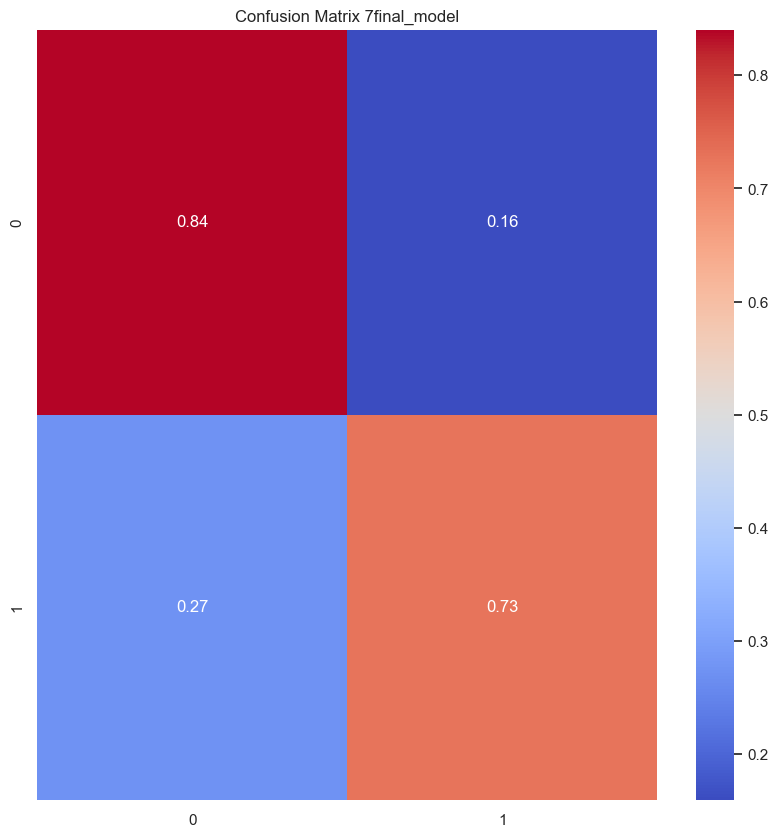

In [93]:
report_and_save(final_model, f'{FEATURENUMBER}final_model', labels_val, type7_val)

In [94]:
best_parameters = {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}